<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

# Background

ACT and SAT are standardized tests that many colleges and universities in the United States require for their admissions process. ACT or SAT score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)) whereas ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). 

Both SAT and ACT have different score ranges, which are available on their websites:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

There are states that require high school students to take standardized test for graduation. This requirement provides every student with a chance to take a college admissions test and encourages students to consider college to apply based on test score.([*source*](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)).

# Problem Statement

This project uses various methods of data analysis and visualization to analyze data from SAT and ACT college entrance exams in year 2017, 2018 and 2019. Hence, this project aims to tackle one central question: 

##### Does high state's participation rate in either ACT or SAT lead to higher test score in respective test?

Content:
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)

# Data Import and Cleaning

**Imports Library**

In [1]:
# Imports libraries.
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import os
import scipy.stats as stats
import csv
import statistics

# Set FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Enable inline plotting, where the plots/graphs will be displayed just below the cell where plotting commands are written and 
# static plots/graphs will be embedded in jupyter notebook. 
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Datasets Chosen for Analysis

In total, there are 6 datasets chosen to complete the analysis.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State --> consists of 7 columns: State, Participation, English, Math, Reading, Science and Composite.
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State --> consists of 3 columns: State, Participation and Composite.
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State --> consists of 3 columns: State, Participation and Composite.
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State --> consists of 4 columns: Participation, Evidence-Based Reading and Writing, Math and Total.
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State --> consists of 4 columns: Participation, Evidence-Based Reading and Writing, Math and Total.
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State --> consists of 5 columns: State, Participation Rate, EBRW, Math and Total.

**Import Datasets**

Import `act_2017.csv`, `act_2018.csv`, `act_2019.csv` and `sat_2017.csv`, `sat_2018.csv`, `sat_2019.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Reading the data from csv file.
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

## Display Data

### Print Each Dataframe Information

In [3]:
# Display information of ACT 2017.
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Observation**:
- Both columns Participation and Composite are objects. These columns will be investigated later.

In [4]:
# Display information of ACT 2018.
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


**Observation**:
- Column Participation is object. This column will be investigated later.

In [5]:
# Display information of ACT 2019.
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


**Observation**:
- Column Participation is object. This column will be investigated later.

In [6]:
# Display information of SAT 2017.
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


**Observation**:
- Column Participation is object. This column will be investigated later.

In [7]:
# Display information of SAT 2018.
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


**Observation**:
- Column Participation is object. This column will be investigated later.

In [8]:
# Display information of SAT 2019.
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


**Observation**:
- Column Participation is object. This column will be investigated later.

### Print the Dimensions of Each Dataframe

In [9]:
# Display rows and colum counts of ACT 2017.
act_2017.shape

(52, 7)

In [10]:
# Display rows and colum counts of ACT 2018.
act_2018.shape

(52, 3)

**Observation**:
- ACT 2018 has 4 lesser columns than that of ACT 2017. This will be investigated later.

In [11]:
# Display rows and colum counts of ACT 2019.
act_2019.shape

(52, 3)

**Observation**:
- ACT 2019 has 4 lesser columns than that of ACT 2017. This will be investigated further.

In [12]:
# Display rows and colum counts of SAT 2017.
sat_2017.shape

(51, 5)

In [13]:
# Display rows and colum counts of SAT 2018.
sat_2018.shape

(51, 5)

In [14]:
# Display rows and colum counts of SAT 2019.
sat_2019.shape

(53, 5)

**Observation**:
- SAT 2019 has 2 more rows than that of SAT 2017 and SAT 2018. This will be investigated further.

### Print the First 5 Rows of Each Dataframe

In [15]:
# Print first 5 rows of ACT 2017.
act_2017.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


**Observation**:
- National's statistic is in first row. This will be investigated further. 

In [16]:
# Print first 5 rows of ACT 2018.
act_2018.head(5)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [17]:
# Print first 5 rows of ACT 2019.
act_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [18]:
# Print first 5 rows of SAT 2017.
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [19]:
# Print first 5 rows of SAT 2018.
sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [20]:
# Print First 5 rows of SAT 2019.
sat_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


### Print the Last 5 Rows of Each Dataframe

In [21]:
# Print last 5 rows of ACT 2017.
act_2017.tail(5)

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


**Observation**:
- Wyoming's Composite is 20.2x. This will be investigated further.

In [22]:
# Print last 5 rows of ACT 2018.
act_2018.tail(5)

,State,Participation,Composite
47,Virginia,24%,23.9
48,Washington,24%,22.2
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0


In [23]:
# Print last 5 rows of ACT 2019.
act_2019.tail(5)

,State,Participation,Composite
47,Washington,24%,22.1
48,West Virginia,49%,20.8
49,Wisconsin,100%,20.3
50,Wyoming,100%,19.8
51,National,52%,20.7


In [24]:
# Print last 5 rows of SAT 2017.
sat_2017.tail(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [25]:
# Print last 5 rows of SAT 2018.
sat_2018.tail(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


In [26]:
# Print last 5 rows of SAT 2019.
sat_2019.tail(5)

,State,Participation Rate,EBRW,Math,Total
48,Virginia,68%,567,551,1119
49,Washington,70%,539,535,1074
50,West Virginia,99%,483,460,943
51,Wisconsin,3%,635,648,1283
52,Wyoming,3%,623,615,1238


## (Summary) Display Data

It is noted that
  - dataframe ACT 2017 Participation and Composite are objects.
  - dataframes ACT 2018, ACT 2019, SAT 2017, SAT 2018, SAT 2019 Participation is an object.
  - dataframe ACT 2017 has additional 4 more columns than that of ACT 2018 and ACT 2019.
  - dataframe SAT 2019 has additional 2 more rows than that of SAT 2017 and SAT 2018.
  - dataframe ACT 2017, ACT 2018 and ACT 2019 have 52 rows; SAT 2017 and SAT 2018 have 51 rows and SAT 2019 has 53 rows. 
  - dataframe ACT 2017 has National's statistic in first row.
  - dataframe ACT 2017 Wyoming's Composite is 20.2x.
  - dataframe ACT 2019 has National's statistic in last row.

We will check for missing data and investigate observations above in following steps.  

## Check for Missing Values

### Check for Null Values (NaN)

In [27]:
# Check for nulls in each column of ACT 2017.
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [28]:
# Check for nulls in each column of ACT 2018.
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [29]:
# Check for nulls in each column of ACT 2019.
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [30]:
# Check for nulls in each column of SAT 2017.
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [31]:
# Check for nulls in each column of SAT 2018.
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [32]:
# Check for nulls in each column of SAT 2019.
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

### Check for Missing Rows

In [33]:
# Function to Check Missing Rows.
def check_missing_rows(file_one, file_two):

    # Initiate data as dictionary.
    data_dictionary = {}

    # Initiate list_file1_not_in_file2 as list.
    list_file1_not_in_file2 = []

    # Open file_two.
    with open ('../data/'+file_two+'.csv', 'rt') as file2:
        for row in csv.reader(file2):                                     # Loop through each row (in list) from file_two.
            data_dictionary[row[0]] = row                                         
        
    # Check file_one against file_two.
    with open ('../data/'+file_one+'.csv', 'rt') as file1:
        for row in csv.reader(file1):                                     # Loop through each row (in list) from file_one.
            if row[0] not in data_dictionary:                    
                list_file1_not_in_file2.append(row[0])                    # Append file_one state name not found in file_two to list_file1_not_in_file2. 
            
    if list_file1_not_in_file2 == [] :
        print ("Dataframe's states are in another dataframe.")
    else:
        list_file1_not_in_file2 = pd.DataFrame (list_file1_not_in_file2, columns = ['missing_states'])
        print(list_file1_not_in_file2)# print (f"Missing states: {list_file1_not_in_file2}")            # Print string entry of state name in file_one that is not in file_two.

**Compare ACT 2017 States against ACT 2018 States**

In [34]:
check_missing_rows(file_one = "act_2017", file_two = "act_2018")

         missing_states
0              National
1  District of Columbia


**Compare ACT 2017 States against ACT 2019 States**

In [35]:
check_missing_rows(file_one = "act_2017", file_two = "act_2019")

Dataframe's states are in another dataframe.


**Compare ACT 2018 States against ACT 2017 States**

In [36]:
check_missing_rows(file_one = "act_2018", file_two = "act_2017")

         missing_states
0  District of columbia


**Compare ACT 2018 States against ACT 2019 States**

In [37]:
check_missing_rows(file_one = "act_2018", file_two = "act_2019")

         missing_states
0  District of columbia


**Compare ACT 2019 States against ACT 2018 States**

In [38]:
check_missing_rows(file_one = "act_2019", file_two = "act_2018")

         missing_states
0  District of Columbia
1              National


**Compare ACT 2017 States against ACT 2019 States**

In [39]:
check_missing_rows(file_one = "act_2017", file_two = "act_2019")

Dataframe's states are in another dataframe.


**Compare SAT 2017 States against SAT 2018 States**

In [40]:
check_missing_rows(file_one = "sat_2017", file_two = "sat_2018")

Dataframe's states are in another dataframe.


**Compare SAT 2017 States against SAT 2019 States**

In [41]:
check_missing_rows(file_one = "sat_2017", file_two = "sat_2019")

Dataframe's states are in another dataframe.


**Compare SAT 2018 States against SAT 2017 States**

In [42]:
check_missing_rows(file_one = "sat_2018", file_two = "sat_2017")

Dataframe's states are in another dataframe.


**Compare SAT 2018 States against SAT 2019 States**

In [43]:
check_missing_rows(file_one = "sat_2018", file_two = "sat_2019")

Dataframe's states are in another dataframe.


**Compare SAT 2019 States against SAT 2017 States**

In [44]:
check_missing_rows(file_one = "sat_2019", file_two = "sat_2017")

   missing_states
0     Puerto Rico
1  Virgin Islands


**Compare SAT 2019 States against SAT 2018 States**

In [45]:
check_missing_rows(file_one = "sat_2019", file_two = "sat_2018")

   missing_states
0     Puerto Rico
1  Virgin Islands


### Check for Missing Columns

In [46]:
# Function to Check Missing Columns.
def check_missing_columns(file_one, file_two):
    
    # Create variables to store file_one and file_two columns.
    column_1 = file_one.columns
    column_2 = file_two.columns

    # Initiate list_col1_not_in_col2 as list.
    list_col1_not_in_col2 = []

    # Check file_one against file_two
    for number in range(len(column_1)):                                        # loop through each element (in list) from file_one
        if column_1[number] not in column_2:                  
            list_col1_not_in_col2.append(column_1[number])    

    if list_col1_not_in_col2 == [] :
        print ("Dataframe's rows are in another dataframe.")
    else:
        list_col1_not_in_col2 = pd.DataFrame(list_col1_not_in_col2, columns = ['missing_columns'])
        print (list_col1_not_in_col2)                                        # print a list appended with column in file_one that is not in file_two

**Compare ACT 2017 Columns against ACT 2018 Columns**

In [47]:
check_missing_columns(file_one = act_2017, file_two = act_2018)

  missing_columns
0         English
1            Math
2         Reading
3         Science


**Compare ACT 2017 Columns against ACT 2019 Columns**

In [48]:
check_missing_columns(file_one = act_2017, file_two = act_2019)

  missing_columns
0         English
1            Math
2         Reading
3         Science


**Compare ACT 2018 Columns against ACT 2017 Columns**

In [49]:
check_missing_columns(file_one = act_2018, file_two = act_2017)

Dataframe's rows are in another dataframe.


**Compare ACT 2018 Columns against ACT 2019 Columns**

In [50]:
check_missing_columns(file_one = act_2018, file_two = act_2019)

Dataframe's rows are in another dataframe.


**Compare ACT 2019 Columns against ACT 2017 Columns**

In [51]:
check_missing_columns(file_one = act_2019, file_two = act_2017)

Dataframe's rows are in another dataframe.


**Compare ACT 2019 Columns against ACT 2018 Columns**

In [52]:
check_missing_columns(file_one = act_2019, file_two = act_2018)

Dataframe's rows are in another dataframe.


**Compare SAT 2017 Columns against SAT 2018 Columns**

In [53]:
check_missing_columns(file_one = sat_2017, file_two = sat_2018)

Dataframe's rows are in another dataframe.


**Compare SAT 2017 Columns against SAT 2019 Columns**

In [54]:
check_missing_columns(file_one = sat_2017, file_two = sat_2019)

                      missing_columns
0                       Participation
1  Evidence-Based Reading and Writing


**Compare SAT 2018 Columns against SAT 2017 Columns**

In [55]:
check_missing_columns(file_one = sat_2018, file_two = sat_2017)

Dataframe's rows are in another dataframe.


**Compare SAT 2018 Columns against SAT 2019 Columns**

In [56]:
check_missing_columns(file_one = sat_2018, file_two = sat_2019)

                      missing_columns
0                       Participation
1  Evidence-Based Reading and Writing


**Compare SAT 2019 Columns against SAT 2017 Columns**

In [57]:
check_missing_columns(file_one = sat_2019, file_two = sat_2017)

      missing_columns
0  Participation Rate
1                EBRW


**Compare SAT 2019 Columns against SAT 2018 Columns**

In [58]:
check_missing_columns(file_one = sat_2019, file_two = sat_2018)

      missing_columns
0  Participation Rate
1                EBRW


## (Summary) Check for Missing Values

**Key Observations**:
  - These rows: 'National', 'District of Columbia', are in ACT 2017 and ACT 2019 but not in ACT 2018.
  - This row: 'District of columbia', is in ACT 2018 but not in both ACT 2017 and ACT 2019.
  - These rows: 'Puerto Rico', 'Virgin Islands', are in SAT 2019 but not in SAT 2017 and SAT 2018.
  - These columns: 'English', 'Math', 'Reading', 'Science', are in ACT 2017 but not in both ACT 2018 and ACT 2019.
  - These columns: 'Participation', 'Evidence-Based Reading and Writing', are in SAT 2017 and SAT 2018 but not in SAT 2019.
  - These columns: 'Participation Rate', 'EBRW', are in SAT 2019 but not in SAT 2017 and SAT 2018.

We will fix data issues later.

### Check for Any Obvious Issues with the Observations

**Check for Outliers in ACT 2017**

In [59]:
# Use pandas describe() to generate summary statistics to determine whether ACT 2017 has outliers. 
act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


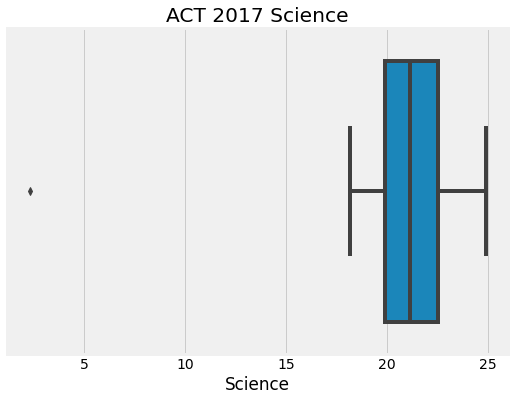

In [60]:
# Create a box plot for ACT 2017 Science column to visualise the distribution of outliers.
sns.boxplot(x=act_2017["Science"], orient = 'h').set(xlabel='Science', title = 'ACT 2017 Science');

**Observation**:
- Science has outlier as its minimum, 2.3, is so small compared to its mean, 21.040385. The outlier could be typo.

**Check for Outliers in ACT 2018**

In [61]:
# Use pandas describe() to generate summary statistics to determine whether ACT 2018 has outliers. 
act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Composite,52.0,21.544231,2.119417,17.7,19.975,21.3,23.725,25.6


**Check for Outliers in ACT 2019**

In [62]:
# Use pandas describe() to generate summary statistics to determine whether ACT 2019 has outliers. 
act_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Composite,52.0,21.45,2.175487,17.9,19.8,20.95,23.65,25.5


**Check for Outliers in SAT 2017**

In [63]:
# Use pandas describe() to generate summary statistics to determine whether SAT 2017 has outliers. 
sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


**Check for Outliers in SAT 2018**

In [64]:
# Use pandas describe() to generate summary statistics to determine whether SAT 2018 has outliers. 
sat_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


**Check for Outliers in SAT 2019**

In [65]:
# Use pandas describe() to generate summary statistics to determine whether SAT 2019 has outliers. 
sat_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
EBRW,53.0,558.000000,47.554422,483.0,518.0,550.0,610.0,636.0
Math,53.0,548.471698,53.785044,445.0,506.0,545.0,596.0,648.0
Total,53.0,1106.528302,100.994784,935.0,1024.0,1097.0,1200.0,1284.0


### Check for Duplicate Values

In [66]:
# Function to Check Missing Columns.
def check_for_duplicate(file, column):

    boolean_series = file.duplicated(subset=column)

    # Print the duplicate state, if any.
    if boolean_series.sum() > 0: 
        print(f"{file[file.duplicated()]}")
    else:
        print(f"There is no duplicate value.")

**Check for Duplicate Values in ACT 2017**

In [67]:
check_for_duplicate(file =  act_2017, column = "State")

There is no duplicate value.


**Check for Duplicate Values in ACT 2018**

In [68]:
check_for_duplicate(file =  act_2018, column = "State")

    State Participation  Composite
20  Maine            7%       24.0


**Check for Duplicate Values in ACT 2019**

In [69]:
check_for_duplicate(file =  act_2019, column = "State")

There is no duplicate value.


**Check for Duplicate Values in SAT 2017**

In [70]:
check_for_duplicate(file =  sat_2017, column = "State")

There is no duplicate value.


**Check for Duplicate Values in SAT 2018**

In [71]:
check_for_duplicate(file =  sat_2018, column = "State")

There is no duplicate value.


**Check for Duplicate Values in SAT 2019**

In [72]:
check_for_duplicate(file =  sat_2019, column = "State")

There is no duplicate value.


### Check for Unique Character in Column Participation

In [73]:
# Function to check Unique Character.
def check_unique_character(file, column):

    # Check column Participation (Participation Rate in SAT 2019) in file to see if there is unique character other than percentage sign %. 
    # Initiate unique_list_not_percentage_sign as a list to store unique characters except percentage sign %.
    unique_list_not_percentage_sign = []

    # Extract a list of unique character from column Participation and assign it to unique_list
    unique_list = file[column].unique()

    # Loop through list of unique character to check for unique character other than percentage sign %.
    for number in range(len(unique_list)):
        if "%" not in unique_list[number]:
            unique_list_not_percentage_sign.append(unique_list[number])

    if unique_list_not_percentage_sign == []:
        print (f"There is no unique character other than %.")
    else:
        print (f"In addition to %, the unique character is", ','.join(unique_list_not_percentage_sign) + ".")        # Print a list to store other unique values other than percentage sign.

**Check for Unique Character in ACT 2017**

In [74]:
check_unique_character(file = act_2017, column = "Participation")

There is no unique character other than %.


**Check for Unique Character in ACT 2018**

In [75]:
check_unique_character(file = act_2018, column = "Participation")

There is no unique character other than %.


**Check for Unique Character in ACT 2019**

In [76]:
check_unique_character(file = act_2019, column = "Participation")

There is no unique character other than %.


**Check for Unique Character in SAT 2017**

In [77]:
check_unique_character(file = sat_2017, column = "Participation")

There is no unique character other than %.


**Check for Unique Character in SAT 2018**

In [78]:
check_unique_character(file = sat_2018, column = "Participation")

There is no unique character other than %.


**Check for Unique Character in SAT 2019**

In [79]:
check_unique_character(file = sat_2019, column = "Participation Rate")

In addition to %, the unique character is —.


## (Summary) Check for Any Obvious Issues with the Observations

**Key Observations**:
 - dataframe ACT 2017 Science column has 1 outlier at 2.3. 
 - dataframe ACT 2018 has 1 duplicate state: Maine, in row 20.
 - dataframe SAT 2019 column Participation has unique character "-" in addition to "%".
 - dataframe ACT 2017, ACT 2018, ACT 2019, SAT 2017 and SAT 2018 column Participation only have unique character "%".

 We will fix data issues later.

## Fix Any Errors Identified

### Fix Errors in ACT 2017

**Error 1: ACT 2017 Wyoming's Composite is 20.2x**

In [80]:
# Fix error 1 by converting ACT 2017 Wyoming's Composite from string to float.
# Remove x and assign 20.2 as this value is close to mean.
act_2017.at[51, "Composite"] = 20.2                         

# Create a new dataframe modified_act_2017 to save the change made.
modified_act_2017 = act_2017

# Display Wyoming's record after fixing the error 1.
modified_act_2017.tail(1)

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


**Error 2: ACT 2017 Science Value is an Outlier at 2.3**

In [81]:
# Locate the row of outlier.
modified_act_2017[modified_act_2017["Science"].eq(2.3)]

# Fix error 2 replacing outlier with 21.4 as it is close to mean of Science at 21.381615.
modified_act_2017.at[21, "Science"] = 21.4   

# Display the record after fixing error 2.
modified_act_2017.loc[[21]]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,21.4,23.6


### Fix Errors in ACT 2018

**Error 1: Duplicate State, Maine, in ACT 2018**

In [82]:
# Create a new dataframe modified_act_2018 to store the change in removing duplicate state: Maine.
modified_act_2018 = act_2018.drop_duplicates(subset='State', keep="first")

# Use the subset parameter to search for duplicate values only in State column of ACT 2018.
boolean_series = modified_act_2018.duplicated(subset='State')

# After fixing error 3, print duplicate state, if any to verify if there is indeed no duplicate state.
if boolean_series.sum() > 0: 
    print(f"Duplicate: \n {act_2018[act_2018.duplicated()]}.")
else:
    print(f"There is no duplicate value.")

There is no duplicate value.


**Error 2: ACT 2018 has different State Name: 'District of columbia'**

In [83]:
# look for row in new dataframe modified_act_2018 whose state name is District of columbia.
modified_act_2018[modified_act_2018["State"].eq("District of columbia")]

# Fix error by aligning new dataframe modified_act_2018 state name with that of ACT 2017 and ACT 2019.
modified_act_2018.at[8, "State"] = "District of Columbia"

# Display the record after fixing error 2.
modified_act_2018.loc[[8]]

,State,Participation,Composite
8,District of Columbia,32%,23.6


## Fix Incorrect Data Types

### Display Data Types of Each Feature

**ACT 2017**

In [84]:
#Display data type of new dataframe modified_act_2017 column Participation.
modified_act_2017.Participation.dtypes

dtype('O')

In [85]:
#Display data type of new dataframe modified_act_2017 column Composite.
modified_act_2017.Composite.dtypes

dtype('O')

**ACT 2018**

In [86]:
#Display data type of new dataframe modified_act_2018 column Participation.
modified_act_2018.Participation.dtypes

dtype('O')

**ACT 2019**

In [87]:
#Display data type of new dataframe act_2019 column Participation.
act_2019.Participation.dtypes

dtype('O')

**SAT 2017**

In [88]:
#Display data type of new dataframe sat_2017 column Participation.
sat_2017.Participation.dtypes

dtype('O')

**SAT 2018**

In [89]:
#Display data type of new dataframe sat_2018 column Participation.
sat_2018.Participation.dtypes

dtype('O')

**SAT 2019**

In [90]:
# #Display data type of new dataframe sat_2019 column Participation Rate.
sat_2019["Participation Rate"].dtypes

dtype('O')

**Key Observations**:
- Data type of column Participation is an object in dataframe modified_act_2017, modified_act_2018, act_2019, sat_2017 and sat_2018 
- Data type of column Participation Rate is an object in dataframe sat_2019
- Data type of column Composite is an object in dataframe modified_act_2017

### Convert Data Type from Object to Float

**Convert Data Type of Dataframe modified_act_2017 Column Composite from Object to Float**

In [91]:
# Convert data type of new dataframe modified_act_2017 column Composite from string to float.
modified_act_2017['Composite'] = modified_act_2017['Composite'].astype(float)

# Display data type of new dataframe column Composite.
modified_act_2017.Composite.dtypes

dtype('float64')

**Convert Data Type of All Dataframes (except for Dataframe sat_2019) Column Participation from Object to Float**

In [92]:
# Function to convert data type of column Participation from object to float.
def convert_object_to_float(dataframe, column):
    
    # Create a new dataframe that converts column Participation from string to float by
    # replacing percentage symbol % in column Participation with blank and then convert the column to float 
    # before dividing each number by 100.
    df_participation = pd.DataFrame(dataframe[column].str.rstrip("%").astype(float)/100)
    
    # Delete existing column Participation in dataframe modified_act_2017.
    dataframe = dataframe.drop(column, axis=1)

    # Join both dataframes df_participation and modified_act_2017
    dataframe = dataframe.join(df_participation)

    # Display data type of new dataframe column Participation.
    print("Data type:", dataframe["Participation"].dtypes)
    
    return dataframe

**ACT 2017**

In [93]:
# Convert data type of dataframe modified_act_2017 column Participation from object to float.
modified_act_2017 = convert_object_to_float(dataframe = modified_act_2017, column ="Participation")

Data type: float64


**ACT 2018**

In [94]:
# Convert data type of dataframe modified_act_2018 column Participation from object to float.
modified_act_2018 = convert_object_to_float(dataframe = modified_act_2018, column ="Participation")

Data type: float64


**ACT 2019**

In [95]:
# Convert data type of dataframe act_2019 column Participation from object to float.
act_2019 = convert_object_to_float(dataframe = act_2019, column ="Participation")

Data type: float64


**SAT 2017**

In [96]:
# Convert data type of dataframe sat_2017 column Participation from object to float.
sat_2017 = convert_object_to_float(dataframe = sat_2017, column ="Participation")

Data type: float64


**SAT 2018**

In [97]:
# Convert data type of dataframe sat_2018 column Participation from object to float.
sat_2018 = convert_object_to_float(dataframe = sat_2018, column ="Participation")

Data type: float64


**SAT 2019**

In [98]:
# Drop rows with unique characters that are not percentage symbol.
sat_2019 = sat_2019[(sat_2019["State"] != "Puerto Rico") & (sat_2019["State"] != "Virgin Islands")]

# Convert data type of new dataframe modified_sat_2019 column Participation Rate from string to float.
# Replace percentage symbol % in column Participation with blank and convert the column to float
sat_2019[sat_2019.columns[1:2]] = sat_2019[sat_2019.columns[1:2]].replace('[%]', '', regex=True).astype(float) 

# Divide each number by 100 to reflect the correct translation from % to float
sat_2019[sat_2019.columns[1:2]] = sat_2019[sat_2019.columns[1:2]]/100

# Save the change in new dataframe modified_sat_2019
modified_sat_2019 = sat_2019

# Display data type of new dataframe column Participation Rate.
modified_sat_2019["Participation Rate"].dtypes

dtype('float64')

### Rename Columns

**ACT 2017**

In [99]:
# Rename new dataframe modified_act_2017 columns' names to all lowercase.
modified_act_2017.columns = ['state', 'english', 'math', 'reading', 'science', 'composite', 'participation']

# Display new dataframe modified_act_2017 renamed columns' names
modified_act_2017.columns

Index(['state', 'english', 'math', 'reading', 'science', 'composite',
       'participation'],
      dtype='object')

**ACT 2018**

In [100]:
# Rename new dataframe modified_act_2018 columns' names to all lowercase.
modified_act_2018.columns = ['state', 'composite', 'participation']

# Display new dataframe modified_act_2018 renamed columns' names
modified_act_2018.columns

Index(['state', 'composite', 'participation'], dtype='object')

**ACT 2019**

In [101]:
# Rename new dataframe act_2019 columns' names to all lowercase.
act_2019.columns = ['state', 'composite', 'participation']

# Display new dataframe act_2019 renamed columns' names
act_2019.columns

Index(['state', 'composite', 'participation'], dtype='object')

**SAT 2017**

In [102]:
# Rename dataframe sat_2017 columns' names to all lowercase.
sat_2017.columns = ['state', 'evidence_based_reading_and_writing', 'math', 'total', 'participation']

# Display dataframe modified_sat_2017 renamed columns' names
sat_2017.columns

Index(['state', 'evidence_based_reading_and_writing', 'math', 'total',
       'participation'],
      dtype='object')

**SAT 2018**

In [103]:
# Rename dataframe sat_2018 columns' names to all lowercase.
sat_2018.columns = ['state', 'evidence_based_reading_and_writing', 'math', 'total', 'participation']

# Display new dataframe sat_2018 renamed columns' names
sat_2018.columns

Index(['state', 'evidence_based_reading_and_writing', 'math', 'total',
       'participation'],
      dtype='object')

**SAT 2019**

In [104]:
# Rename new dataframe modified_sat_2019 columns' names to all lowercase.
modified_sat_2019.columns = ['state', 'participation_rate', 'ebrw', 'math', 'total']

# Display new dataframe modified_sat_2019 renamed columns' names
modified_sat_2019.columns

Index(['state', 'participation_rate', 'ebrw', 'math', 'total'], dtype='object')

### Drop Unnecessary Rows

**ACT 2017**

In [105]:
# Remove National statistic from dataframe modified_act_2017. 
modified_act_2017 = modified_act_2017[(modified_act_2017["state"] != "National")]

# Print National statistic has been removed from dataframe modified_act_2017. 
if modified_act_2017.loc[modified_act_2017["state"] == "National"].empty:
    print("National statistic has been removed from new dataframe modified_act_2017.")

# Print dataframe modified_act_2017 row and column after removing National statistic
print(modified_act_2017.shape)

# Display first 5 rows in dataframe modified_act_2017 after removing National statistic
modified_act_2017.head()

National statistic has been removed from new dataframe modified_act_2017.
(51, 7)


,state,english,math,reading,science,composite,participation
1,Alabama,18.9,18.4,19.7,19.4,19.2,1.00
2,Alaska,18.7,19.8,20.4,19.9,19.8,0.65
3,Arizona,18.6,19.8,20.1,19.8,19.7,0.62
4,Arkansas,18.9,19.0,19.7,19.5,19.4,1.00
5,California,22.5,22.7,23.1,22.2,22.8,0.31


**ACT 2019**

In [106]:
# Remove National statistic from dataframe act_2019. 
act_2019 = act_2019[(act_2019["state"] != "National")]

# Print National statistic has been removed from dataframe act_2019. 
if act_2019.loc[act_2019["state"] == "National"].empty:
    print("National statistic has been removed from new dataframe modified_act_2019.")

# Print dataframe act_2019 row and column after removing National statistic
print(act_2019.shape)

# Display bottom 5 rows in dataframe act_2019 after removing National statistic
act_2019.tail()

National statistic has been removed from new dataframe modified_act_2019.
(51, 3)


,state,composite,participation
46,Virginia,24.0,0.21
47,Washington,22.1,0.24
48,West Virginia,20.8,0.49
49,Wisconsin,20.3,1.00
50,Wyoming,19.8,1.00


### Perform Additional Cleaning

**ACT 2017**

In [107]:
# Remove columns english, math, reading and science from modified_act_2017
modified_act_2017 = modified_act_2017.drop(['english', 'math', 'reading', 'science'], axis=1)

# Display first 5 rows of modified_act_2017 after dropping columns
modified_act_2017.head()

,state,composite,participation
1,Alabama,19.2,1.00
2,Alaska,19.8,0.65
3,Arizona,19.7,0.62
4,Arkansas,19.4,1.00
5,California,22.8,0.31


**SAT 2017**

In [108]:
# Remove columns english, math, reading and science from sat_2017
sat_2017 = sat_2017.drop(['evidence_based_reading_and_writing', 'math'], axis=1)

# Display first 5 rows of modified_sat_2017 after dropping columns
sat_2017.head()

,state,total,participation
0,Alabama,1165,0.05
1,Alaska,1080,0.38
2,Arizona,1116,0.30
3,Arkansas,1208,0.03
4,California,1055,0.53


**SAT 2018**

In [109]:
# Remove columns english, math, reading and science from sat_2018.
sat_2018 = sat_2018.drop(['evidence_based_reading_and_writing', 'math'], axis=1)

# Display 5 rows of sat_2018 after dropping columns.
sat_2018.head()

,state,total,participation
0,Alabama,1166,0.06
1,Alaska,1106,0.43
2,Arizona,1149,0.29
3,Arkansas,1169,0.05
4,California,1076,0.60


**SAT 2019**

In [110]:
# Remove columns english, math, reading and science from modified_sat_2019
modified_sat_2019 = modified_sat_2019.drop(['ebrw', 'math'], axis=1)

# Display first 5 rows of modified_sat_2019 after dropping columns
modified_sat_2019.head()

,state,participation_rate,total
0,Alabama,0.07,1143
1,Alaska,0.41,1097
2,Arizona,0.31,1134
3,Arkansas,0.06,1141
4,California,0.63,1065


### Merge Dataframes

**Merge Dataframes modified_act_2017, modified_act_2018 and act_2019**

In [111]:
# Merge both dataframes modified_act_2017 and modified_act_2018.
combined_modified_act_2017_2018 = pd.merge(left = modified_act_2017,
                                           right = modified_act_2018,
                                           on = "state")

# Rename merged dataframe combined_modified_act_2017_2018 columns' names.
combined_modified_act_2017_2018.rename(columns={'participation_x': 'participation_act_2017', 
                                                'composite_x': 'composite_act_2017',
                                                'participation_y': 'participation_act_2018',
                                                'composite_y': 'composite_act_2018'}, inplace=True)

# Display first 5 rows of merged dataframe combined_modified_act_2017_2018 after renaming columns' names.
combined_modified_act_2017_2018.head()

,state,composite_act_2017,participation_act_2017,composite_act_2018,participation_act_2018
0,Alabama,19.2,1.00,19.1,1.00
1,Alaska,19.8,0.65,20.8,0.33
2,Arizona,19.7,0.62,19.2,0.66
3,Arkansas,19.4,1.00,19.4,1.00
4,California,22.8,0.31,22.7,0.27


In [112]:
# Merge both dataframe act_2019 and combined_modified_act_2017_2018
combined_modified_act_2017_2018_2019 = pd.merge(left = combined_modified_act_2017_2018,
                                                right = act_2019,
                                                on = "state")

# Rename merge dataframe combined_modified_act_2017_2018_2019 columns' names.
combined_modified_act_2017_2018_2019.rename(columns={'participation': 'participation_act_2019', 
                                                      'composite': 'composite_act_2019'}, inplace=True)

# Display first 5 rows of merge dataframe combined_modified_act_2017_2018_2019 after renaming columns' names.
combined_modified_act_2017_2018_2019.head()

,state,composite_act_2017,participation_act_2017,composite_act_2018,participation_act_2018,composite_act_2019,participation_act_2019
0,Alabama,19.2,1.00,19.1,1.00,18.9,1.00
1,Alaska,19.8,0.65,20.8,0.33,20.1,0.38
2,Arizona,19.7,0.62,19.2,0.66,19.0,0.73
3,Arkansas,19.4,1.00,19.4,1.00,19.3,1.00
4,California,22.8,0.31,22.7,0.27,22.6,0.23


**Merge Dataframes modified_sat_2017, modified_sat_2018 and modified_sat_2019**

In [113]:
# Merge both dataframe sat_2017 and sat_2018.
combined_modified_sat_2017_2018 = pd.merge(left = sat_2017,
                                           right = sat_2018,
                                           on = "state")

# Rename merge dataframe combined_modified_sat_2017_2018 columns' names.
combined_modified_sat_2017_2018.rename(columns={'participation_x': 'participation_sat_2017', 
                                                 'total_x': 'total_sat_2017',
                                                 'participation_y': 'participation_sat_2018',
                                                 'total_y': 'total_sat_2018'}, inplace=True)

# Display first 5 rows of merge dataframe combined_modified_act_2017_2018 after renaming columns' names.
combined_modified_sat_2017_2018.head()

,state,total_sat_2017,participation_sat_2017,total_sat_2018,participation_sat_2018
0,Alabama,1165,0.05,1166,0.06
1,Alaska,1080,0.38,1106,0.43
2,Arizona,1116,0.30,1149,0.29
3,Arkansas,1208,0.03,1169,0.05
4,California,1055,0.53,1076,0.60


In [114]:
# Merge both dataframe modified_sat_2019 and combined_modified_sat_2017_2018
combined_modified_sat_2017_2018_2019 = pd.merge(left = combined_modified_sat_2017_2018,
                                                right = modified_sat_2019,
                                                on = "state")

# Rename merge dataframe combined_modified_sat_2017_2018_2019 columns' names.
combined_modified_sat_2017_2018_2019.rename(columns={'participation_rate': 'participation_sat_2019', 
                                                     'total': 'total_sat_2019'}, inplace=True)

# Display first 5 rows of merge dataframe combined_modified_sat_2017_2018_2019 after renaming columns' names.
combined_modified_sat_2017_2018_2019.head()

,state,total_sat_2017,participation_sat_2017,total_sat_2018,participation_sat_2018,participation_sat_2019,total_sat_2019
0,Alabama,1165,0.05,1166,0.06,0.07,1143
1,Alaska,1080,0.38,1106,0.43,0.41,1097
2,Arizona,1116,0.30,1149,0.29,0.31,1134
3,Arkansas,1208,0.03,1169,0.05,0.06,1141
4,California,1055,0.53,1076,0.60,0.63,1065


In [115]:
# Merge both dataframe combined_modified_act_2017_2018_2019 and combined_modified_sat_2017_2018_2019
combined_act_sat_2017_2018_2019 = pd.merge(left = combined_modified_act_2017_2018_2019,
                                                right = combined_modified_sat_2017_2018_2019,
                                                on = "state")

# Display first 5 rows of merge dataframe combined_act_sat_2017_2018_2019 after renaming columns' names.
combined_act_sat_2017_2018_2019.head()

,state,composite_act_2017,participation_act_2017,composite_act_2018,participation_act_2018,composite_act_2019,participation_act_2019,total_sat_2017,participation_sat_2017,total_sat_2018,participation_sat_2018,participation_sat_2019,total_sat_2019
0,Alabama,19.2,1.00,19.1,1.00,18.9,1.00,1165,0.05,1166,0.06,0.07,1143
1,Alaska,19.8,0.65,20.8,0.33,20.1,0.38,1080,0.38,1106,0.43,0.41,1097
2,Arizona,19.7,0.62,19.2,0.66,19.0,0.73,1116,0.30,1149,0.29,0.31,1134
3,Arkansas,19.4,1.00,19.4,1.00,19.3,1.00,1208,0.03,1169,0.05,0.06,1141
4,California,22.8,0.31,22.7,0.27,22.6,0.23,1055,0.53,1076,0.60,0.63,1065


### Save Cleaned and Merged Dataframes as CSV Files

In [116]:
# Export merged dataframes combined_modified_act_2017_2018_2019 as csv file.
combined_modified_act_2017_2018_2019.to_csv('../data/combined_modified_act_2017_2018_2019.csv', index=False)

In [117]:
# Export merged dataframes combined_modified_sat_2017_2018_2019 as csv file.
combined_modified_sat_2017_2018_2019.to_csv('../data/combined_modified_sat_2017_2018_2019.csv', index=False)

In [118]:
# Merred dataframes combined_modified_act_2017_2018_2019 and combined_modified_sat_2017_2018_2019 as csv file.
combined_act_sat_2017_2018_2019.to_csv('../data/combined_act_sat_2017_2018_2019.csv', index=False)

### Data Dictionary

Tables below show data dictionaries for all 3 merged dataframes.

##### Dataframe combined_modified_act_2017_2018_2019:

|Feature                   |Type    |Dataset                |Description                                                                                           |
|--------------------------|--------|-----------------------|------------------------------------------------------------------------------------------------------|
|**state**                 |*object*|ACT 2017, 2018 and 2019|All states in United States of America (exclude Puerto Rico and Virgin Islands).                      |
|**participation_act_2017**|*float* |ACT 2017, 2018 and 2019|Participation rate of the state in ACT for year 2017.                                                 |
|**composite_act_2017**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2017 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|
|**participation_act_2018**|*float* |ACT 2017, 2018 and 2019|The participation rate of the state in ACT for year 2018.                                             | 
|**composite_act_2018**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2018 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|
|**participation_act_2019**|*float* |ACT 2017, 2018 and 2019|The participation rate of the state in ACT for year 2019.                                             | 
|**composite_act_2019**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2019 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|

##### Dataframe combined_modified_sat_2017_2018_2019:

|Feature                   |Type    |Dataset                |Description                                                                                           |
|--------------------------|--------|-----------------------|------------------------------------------------------------------------------------------------------|
|**state**                 |*object*|SAT 2017, 2018 and 2019|All states in United States of America (exclude Puerto Rico and Virgin Islands).                      |
|**participation_sat_2017**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2017                                                                     | |**total_sat_2017**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2017 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|
|**participation_sat_2018**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2018.                                             | 
|**total_sat_2018**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2018 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|
|**participation_sat_2019**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2019.                                             | 
|**total_sat_2019**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2019 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|

##### Dataframes combined_act_sat_2017_2018_2019:

|Feature                   |Type    |Dataset                |Description                                                                                                                                   |
|--------------------------|--------|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
|**state**                 |*object*|ACT 2017, 2018 and 2019|All states in United States of America (exclude Puerto Rico and Virgin Islands).                                |
|**participation_act_2017**|*float* |ACT 2017, 2018 and 2019|Participation rate of the state in ACT for year 2017.                                                           |
|**composite_act_2017**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2017 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|
|**participation_act_2018**|*float* |ACT 2017, 2018 and 2019|The participation rate of the state in ACT for year 2018.                                                       | 
|**composite_act_2018**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2018 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|
|**participation_act_2019**|*float* |ACT 2017, 2018 and 2019|The participation rate of the state in ACT for year 2019.                                                       | 
|**composite_act_2019**    |*float* |ACT 2017, 2018 and 2019|Composite score for year 2019 is the average of four test scores: English, mathematics, reading, science; range from 1 (low) to 36 (high) and rounded to the nearest whole number.|
|**participation_sat_2017**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2017                                                        |
|**total_sat_2017**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2017 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|
|**participation_sat_2018**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2018.                                                       | 
|**total_sat_2018**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2018 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|
|**participation_sat_2019**|*float* |SAT 2017, 2018 and 2019|The participation rate of the state in SAT for year 2019.                                                       | 
|**total_sat_2019**        |*float* |SAT 2017, 2018 and 2019|Total score for year 2019 is the sum of the two sections: evidence-based reading and writing section and math section; range from 400 to 1600.|


[Click here for more information on ACT Test Score Source](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html#:~:text=Your%20Compos[…]%20are%20rounded%20up)[ and SAT Test Score Source.](https://satsuite.collegeboard.org/sat/scores/understanding-scores/your-score-report-explained )



# Exploratory Data Analysis

## Summary Statistics

In [119]:
# Generate descriptive statistics that summarizes the central tendency, dispersion and shape of merged dataframe combined_modified_act_2017_2018_2019 distribution.
combined_modified_act_2017_2018_2019.describe()

,composite_act_2017,participation_act_2017,composite_act_2018,participation_act_2018,composite_act_2019,participation_act_2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,21.519608,0.652549,21.496078,0.617255,21.464706,0.586667
std,2.020695,0.321408,2.111583,0.340371,2.194523,0.345159
min,17.800000,0.080000,17.700000,0.070000,17.900000,0.060000
25%,19.800000,0.310000,19.950000,0.285000,19.800000,0.245000
50%,21.400000,0.690000,21.300000,0.660000,21.100000,0.540000
75%,23.600000,1.000000,23.650000,1.000000,23.700000,1.000000
max,25.500000,1.000000,25.600000,1.000000,25.500000,1.000000


**Observation**:
- From year 2017 to 2019, mean, median and minimum of participation and composite were on downward trend. We will further investigate in section Visualize the Data.

In [120]:
# Generate descriptive statistics that summarizes the central tendency, dispersion and shape of merged dataframe combined_modified_sat_2017_2018_2019 distribution.
combined_modified_sat_2017_2018_2019.describe()

,total_sat_2017,participation_sat_2017,total_sat_2018,participation_sat_2018,participation_sat_2019,total_sat_2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1126.098039,0.398039,1120.019608,0.457451,0.490588,1113.078431
std,92.494812,0.352766,94.155083,0.373143,0.387476,97.197910
min,950.000000,0.020000,977.000000,0.020000,0.020000,943.000000
25%,1055.500000,0.040000,1057.500000,0.045000,0.055000,1038.000000
50%,1107.000000,0.380000,1098.000000,0.520000,0.540000,1097.000000
75%,1212.000000,0.660000,1204.000000,0.775000,0.820000,1210.000000
max,1295.000000,1.000000,1298.000000,1.000000,1.000000,1284.000000


**Observation**:
- from year 2017 to 2019, mean and median of participation have increased while its mean and median of total SAT scores have decreased. We will further investigate in section Visualize the Data.

In [121]:
combined_act_sat_2017_2018_2019.describe()

,composite_act_2017,participation_act_2017,composite_act_2018,participation_act_2018,composite_act_2019,participation_act_2019,total_sat_2017,participation_sat_2017,total_sat_2018,participation_sat_2018,participation_sat_2019,total_sat_2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,21.519608,0.652549,21.496078,0.617255,21.464706,0.586667,1126.098039,0.398039,1120.019608,0.457451,0.490588,1113.078431
std,2.020695,0.321408,2.111583,0.340371,2.194523,0.345159,92.494812,0.352766,94.155083,0.373143,0.387476,97.197910
min,17.800000,0.080000,17.700000,0.070000,17.900000,0.060000,950.000000,0.020000,977.000000,0.020000,0.020000,943.000000
25%,19.800000,0.310000,19.950000,0.285000,19.800000,0.245000,1055.500000,0.040000,1057.500000,0.045000,0.055000,1038.000000
50%,21.400000,0.690000,21.300000,0.660000,21.100000,0.540000,1107.000000,0.380000,1098.000000,0.520000,0.540000,1097.000000
75%,23.600000,1.000000,23.650000,1.000000,23.700000,1.000000,1212.000000,0.660000,1204.000000,0.775000,0.820000,1210.000000
max,25.500000,1.000000,25.600000,1.000000,25.500000,1.000000,1295.000000,1.000000,1298.000000,1.000000,1.000000,1284.000000


**Observation**:
- Both ACT and SAT statistics are combined and showns as above. We will investigate the correlation of these items in section Visualize the Data.

### Investigate trends in the data.
- Which states have the highest and lowest participation rates?
- Which states have the highest and lowest mean total/composite scores for?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests in each year?

## Which States have the Highest and Lowest Participation Rates?

**ACT 2017**

In [122]:
# Top 10 states with highest ACT participation in 2017
combined_modified_act_2017_2018_2019[['state','participation_act_2017']].sort_values(by=['participation_act_2017']).tail(10)

,state,participation_act_2017
26,Montana,1.0
49,Wisconsin,1.0
24,Mississippi,1.0
23,Minnesota,1.0
18,Louisiana,1.0
17,Kentucky,1.0
5,Colorado,1.0
3,Arkansas,1.0
36,Oklahoma,1.0
50,Wyoming,1.0


**Observation**:
- These are top 10 states with highest ACT participation in year 2017.

In [123]:
# Bottom 10 states with lowest ACT participation in 2017
combined_modified_act_2017_2018_2019[['state','participation_act_2017']].sort_values(by=['participation_act_2017']).head(10)

,state,participation_act_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


**Observation**:
- These are bottom 10 states with lowest ACT participation in year 2017.

**ACT 2018**

In [124]:
# Top 10 states with highest ACT participation in 2018
combined_modified_act_2017_2018_2019[['state','participation_act_2018']].sort_values(by=['participation_act_2018']).tail(10)

,state,participation_act_2018
28,Nevada,1.0
27,Nebraska,1.0
26,Montana,1.0
49,Wisconsin,1.0
24,Mississippi,1.0
18,Louisiana,1.0
17,Kentucky,1.0
3,Arkansas,1.0
36,Oklahoma,1.0
50,Wyoming,1.0


**Observation**:
- These are top 10 states with highest ACT participation in year 2018.

In [125]:
# Bottom 10 states with lowest ACT participation in 2018
combined_modified_act_2017_2018_2019[['state','participation_act_2018']].sort_values(by=['participation_act_2018']).head(10)

,state,participation_act_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


**Observation**:
- These are bottom 10 states with lowest ACT participation in year 2018.

**ACT 2019**

In [126]:
# Top 10 states with highest ACT participation in 2019
combined_modified_act_2017_2018_2019[['state','participation_act_2019']].sort_values(by=['participation_act_2019']).tail(10)

,state,participation_act_2019
28,Nevada,1.0
27,Nebraska,1.0
26,Montana,1.0
49,Wisconsin,1.0
24,Mississippi,1.0
18,Louisiana,1.0
17,Kentucky,1.0
3,Arkansas,1.0
36,Oklahoma,1.0
50,Wyoming,1.0


**Observation**:
- These are top 10 states with highest ACT participation in year 2019.

In [127]:
# Bottom 10 states with lowest ACT participation in 2019
combined_modified_act_2017_2018_2019[['state','participation_act_2019']].sort_values(by=['participation_act_2019']).head(10)

,state,participation_act_2019
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17
22,Michigan,0.19
45,Vermont,0.20
46,Virginia,0.21
21,Massachusetts,0.21
32,New York,0.22


**Observation**:
- These are bottom 10 states with lowest ACT participation in year 2019.

**SAT 2017**

In [128]:
# Top 10 states with highest SAT participation in 2017
combined_modified_sat_2017_2018_2019[['state','participation_sat_2017']].sort_values(by=['participation_sat_2017']).tail(10)

,state,participation_sat_2017
39,Rhode Island,0.71
21,Massachusetts,0.76
9,Florida,0.83
12,Idaho,0.93
19,Maine,0.95
29,New Hampshire,0.96
22,Michigan,1.00
8,District of Columbia,1.00
7,Delaware,1.00
6,Connecticut,1.00


**Observation**:
- These are top 10 states with highest SAT participation in year 2017.

In [129]:
# Bottom 10 states with lowest SAT participation in 2017
combined_modified_sat_2017_2018_2019[['state','participation_sat_2017']].sort_values(by=['participation_sat_2017']).head(10)

,state,participation_sat_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


**Observation**:
- These are bottom 10 states with lowest SAT participation in year 2017.

**SAT 2018**

In [130]:
# Top 10 states with highest SAT participation in 2018
combined_modified_sat_2017_2018_2019[['state','participation_sat_2018']].sort_values(by=['participation_sat_2018']).tail(10)

,state,participation_sat_2018
8,District of Columbia,0.92
29,New Hampshire,0.96
39,Rhode Island,0.97
19,Maine,0.99
13,Illinois,0.99
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00


**Observation**:
- These are top 10 states with highest SAT participation in year 2018.

In [131]:
# Bottom 10 states with lowest SAT participation in 2018
combined_modified_sat_2017_2018_2019[['state','participation_sat_2018']].sort_values(by=['participation_sat_2018']).head(10)

,state,participation_sat_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


**Observation**:
- These are bottom 10 states with lowest SAT participation in year 2018.

**SAT 2019**

In [132]:
# Bottom 10 states with lowest SAT participation in 2019
combined_modified_sat_2017_2018_2019[['state','participation_sat_2019']].sort_values(by=['participation_sat_2019']).head(10)

,state,participation_sat_2019
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
17,Kentucky,0.04


**Observation**:
- These are top 10 states with highest SAT participation in year 2019.

In [133]:
# Top 10 states with highest SAT participation in 2019
combined_modified_sat_2017_2018_2019[['state','participation_sat_2019']].sort_values(by=['participation_sat_2019']).tail(10)

,state,participation_sat_2019
48,West Virginia,0.99
19,Maine,0.99
9,Florida,1.00
39,Rhode Island,1.00
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
13,Illinois,1.00
12,Idaho,1.00


**Observation**:
- These are bottom 10 states with lowest SAT participation in year 2019.

## Which states have the Highest and Lowest Mean Total/Composite Scores?

**ACT 2017**

In [134]:
# Top 10 states with highest ACT mean composite scores in 2017.
combined_modified_act_2017_2018_2019[['state','composite_act_2017']].sort_values(by=['composite_act_2017']).tail(10)

,state,composite_act_2017
30,New Jersey,23.9
39,Rhode Island,24.0
7,Delaware,24.1
22,Michigan,24.1
32,New York,24.2
8,District of Columbia,24.2
19,Maine,24.3
6,Connecticut,25.2
21,Massachusetts,25.4
29,New Hampshire,25.5


**Observation**:
- These are top 10 states with highest ACT mean composite scores in year 2017.

In [135]:
# Bottom 10 states with lowest ACT mean composite scores in 2017.
combined_modified_act_2017_2018_2019[['state','composite_act_2017']].sort_values(by=['composite_act_2017']).head(10)

,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


**Observation**:
- These are bottom 10 states with lowest ACT mean composite scores in year 2017.

**ACT 2018**

In [136]:
# Top 10 states with highest ACT mean composite scores in 2018.
combined_modified_act_2017_2018_2019[['state','composite_act_2018']].sort_values(by=['composite_act_2018']).tail(10)

,state,composite_act_2018
46,Virginia,23.9
13,Illinois,23.9
19,Maine,24.0
45,Vermont,24.1
39,Rhode Island,24.2
22,Michigan,24.2
32,New York,24.5
29,New Hampshire,25.1
21,Massachusetts,25.5
6,Connecticut,25.6


**Observation**:
- These are top 10 states with highest ACT mean composite scores in year 2018.

In [137]:
# Bottom 10 states with lowest ACT mean composite scores in 2018.
combined_modified_act_2017_2018_2019[['state','composite_act_2018']].sort_values(by=['composite_act_2018']).head(10)

,state,composite_act_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


**Observation**:
- These are bottom 10 states with lowest ACT mean composite scores in year 2018.

**ACT 2019**

In [138]:
# Top 10 states with highest ACT mean composite scores in 2019.
combined_modified_act_2017_2018_2019[['state','composite_act_2019']].sort_values(by=['composite_act_2019']).tail(10)

,state,composite_act_2019
7,Delaware,24.1
30,New Jersey,24.2
19,Maine,24.3
13,Illinois,24.3
22,Michigan,24.4
32,New York,24.5
39,Rhode Island,24.7
29,New Hampshire,25.0
6,Connecticut,25.5
21,Massachusetts,25.5


**Observation**:
- These are top 10 states with highest ACT mean composite scores in year 2019.

In [139]:
# Bottom 10 states with lowest ACT mean composite scores in 2019.
combined_modified_act_2017_2018_2019[['state','composite_act_2019']].sort_values(by=['composite_act_2019']).head(10)

,state,composite_act_2019
28,Nevada,17.9
24,Mississippi,18.4
40,South Carolina,18.8
18,Louisiana,18.8
0,Alabama,18.9
36,Oklahoma,18.9
2,Arizona,19.0
33,North Carolina,19.0
11,Hawaii,19.0
3,Arkansas,19.3


**Observation**:
- These are bottom 10 states with lowest ACT mean composite scores in year 2019.

**SAT 2017**

In [140]:
# Top 10 states with highest SAT total scores in 2017.
combined_modified_sat_2017_2018_2019[['state','total_sat_2017']].sort_values(by=['total_sat_2017']).tail(10)

,state,total_sat_2017
44,Utah,1238
24,Mississippi,1242
17,Kentucky,1247
27,Nebraska,1253
34,North Dakota,1256
16,Kansas,1260
25,Missouri,1271
15,Iowa,1275
49,Wisconsin,1291
23,Minnesota,1295


**Observation**:
- These are top 10 states with highest SAT total scores in year 2017.

In [141]:
# Bottom 10 states with lowest SAT total scores in 2017.
combined_modified_sat_2017_2018_2019[['state','total_sat_2017']].sort_values(by=['total_sat_2017']).head(10)

,state,total_sat_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
36,Oklahoma,1047
10,Georgia,1050


**Observation**:
- These are bottom 10 states with lowest SAT total scores in year 2017.

**SAT 2018**

In [142]:
# Top 10 states with highest SAT total scores in 2018.
combined_modified_sat_2017_2018_2019[['state','total_sat_2018']].sort_values(by=['total_sat_2018']).tail(10)

,state,total_sat_2018
41,South Dakota,1240
17,Kentucky,1248
27,Nebraska,1252
50,Wyoming,1257
25,Missouri,1262
16,Kansas,1265
15,Iowa,1265
34,North Dakota,1283
49,Wisconsin,1294
23,Minnesota,1298


**Observation**:
- These are top 10 states with highest SAT total scores in year 2018.

In [143]:
# Bottom 10 states with lowest SAT total scores in 2018.
combined_modified_sat_2017_2018_2019[['state','total_sat_2018']].sort_values(by=['total_sat_2018']).head(10)

,state,total_sat_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010
11,Hawaii,1010
22,Michigan,1011
19,Maine,1013
39,Rhode Island,1018
13,Illinois,1019


**Observation**:
- These are bottom 10 states with lowest SAT total scores in year 2018.

**SAT 2019**

In [144]:
# Top 10 states with highest SAT total scores in 2019.
combined_modified_sat_2017_2018_2019[['state','total_sat_2019']].sort_values(by=['total_sat_2019']).tail(10)

,state,total_sat_2019
25,Missouri,1236
24,Mississippi,1237
50,Wyoming,1238
16,Kansas,1241
15,Iowa,1244
27,Nebraska,1260
34,North Dakota,1263
41,South Dakota,1268
49,Wisconsin,1283
23,Minnesota,1284


**Observation**:
- These are top 10 states with highest SAT total scores in year 2019.

In [145]:
# Bottom 10 states with lowest SAT total scores in 2019.
combined_modified_sat_2017_2018_2019[['state','total_sat_2019']].sort_values(by=['total_sat_2019']).head(10)

,state,total_sat_2019
48,West Virginia,943
36,Oklahoma,963
8,District of Columbia,975
7,Delaware,985
12,Idaho,993
39,Rhode Island,995
9,Florida,999
22,Michigan,1003
19,Maine,1013
13,Illinois,1013


**Observation**:
- These are bottom 10 states with lowest SAT total scores in year 2019.

## Do Any States with 100% Participation on a Given Test Have a Rate Change Year-to-year?

In [146]:
# Filter for states with 100% ACT participation in year 2017 and less than 100% participation in year 2018; or
# 100% participation in year 2018 and less than 100% participation in year 2019
combined_modified_act_2017_2018_2019 = combined_modified_act_2017_2018_2019.loc[(combined_modified_act_2017_2018_2019['participation_act_2017'] == 1) & 
                                                                                (combined_modified_act_2017_2018_2019['participation_act_2018'] < 1) | 
                                                                                (combined_modified_act_2017_2018_2019['participation_act_2018'] == 1) & 
                                                                                (combined_modified_act_2017_2018_2019['participation_act_2019'] < 1)
                                                                               ]

# Filter for columns states, participation_act_2017, participation_act_2018 and participation_act_2019
combined_modified_act_2017_2018_2019 = combined_modified_act_2017_2018_2019[['state','participation_act_2017', 'participation_act_2018', 'participation_act_2019']]

# Display states participation in year 2017, 2018 and 2019 next to each other
combined_modified_act_2017_2018_2019

,state,participation_act_2017,participation_act_2018,participation_act_2019
5,Colorado,1.0,0.30,0.27
23,Minnesota,1.0,0.99,0.95
25,Missouri,1.0,1.00,0.82
40,South Carolina,1.0,1.00,0.78


**Observation**:
- In year 2017, Colorado and Minnesota had 100% participation rate in ACT but their participation rates have dropped in year 2018 in which Colorado participation rate dropped to 30% in year 2018. Similarly, in year 2018, both Missouri and South Carolina had 100% participation rate but their participation rates have dropped in year 2019.

In [147]:
# Filter for states with 100% SAT participation in year 2017 and less than 100% participation in year 2018; or 
# 100% SAT participation in year 2018 and less than 100% participation in year 2019
combined_modified_sat_2017_2018_2019 = combined_modified_sat_2017_2018_2019.loc[(combined_modified_sat_2017_2018_2019["participation_sat_2017"]==1) & 
                                                                                (combined_modified_sat_2017_2018_2019["participation_sat_2018"] <1) |
                                                                                (combined_modified_sat_2017_2018_2019["participation_sat_2018"]==1) & 
                                                                                (combined_modified_sat_2017_2018_2019["participation_sat_2019"] <1) 
                                                                                ]

# Filter for columns states, participation_sat_2017, participation_sat_2018 and participation_sat_2019
combined_modified_sat_2017_2018_2019 = combined_modified_sat_2017_2018_2019[['state','participation_sat_2017', 'participation_sat_2018', 'participation_sat_2019']]

# Display states participation in year 2017, 2018 and 2019 next to each other
combined_modified_sat_2017_2018_2019

,state,participation_sat_2017,participation_sat_2018,participation_sat_2019
8,District of Columbia,1.0,0.92,0.94


**Observation**:
- District of Columbia had 100% participation rate in year 2017 but its participation rate dropped to 92% in year 2018.

## Do Any States have >50% Participation on *Both* Tests in Each Year?

In [148]:
# Filter for states that show >50% participation on *both* tests in each year from 2017 to 2019.
# Select columns states, participation_act_2017, participation_sat_2017, participation_act_2018, participation_sat_2018, participation_act_2019, participation_sat_2019.
combined_act_sat_2017_2018_2019 = combined_act_sat_2017_2018_2019[['state','participation_act_2017', 'participation_sat_2017', 'participation_act_2018', 'participation_sat_2018', 'participation_act_2019', 'participation_sat_2019']]

# Reload dataframe combined_act_sat_2017_2018_2019 to remove filtering in previous step above
combined_act_sat_2017_2018_2019 = pd.read_csv('../data/combined_act_sat_2017_2018_2019.csv')

# Filter for states that show >50% participation on *both* test.
combined_act_sat_2017_2018_2019 = combined_act_sat_2017_2018_2019.loc[((combined_act_sat_2017_2018_2019['participation_act_2017'] >= 0.50) & 
                                                                      (combined_act_sat_2017_2018_2019['participation_sat_2017'] >= 0.50))
                                                                     ]

# Display states that show >=51% participation on *both* tests in year 2017.
print(combined_act_sat_2017_2018_2019[['state', 'participation_act_2017', 'participation_sat_2017']])
print("\n")

# Filter for states that show >50% participation on *both* test.

combined_act_sat_2017_2018_2019 = combined_act_sat_2017_2018_2019.loc[((combined_act_sat_2017_2018_2019['participation_act_2018'] >= 0.50) & 
                                                                      (combined_act_sat_2017_2018_2019['participation_sat_2018'] >= 0.50))
                                                                     ]

# Display states that show >=51% participation on *both* tests in year 2018.
print(combined_act_sat_2017_2018_2019[['state', 'participation_act_2018', 'participation_sat_2018']])
print("\n")

# Filter for states that show >50% participation on *both* test.
combined_act_sat_2017_2018_2019 = combined_act_sat_2017_2018_2019.loc[((combined_act_sat_2017_2018_2019['participation_act_2019'] >= 0.50) & 
                                                                      (combined_act_sat_2017_2018_2019['participation_sat_2019'] >= 0.50))
                                                                     ]

# Display states that show >=51% participation on *both* tests in year 2019.
print(combined_act_sat_2017_2018_2019[['state', 'participation_act_2019', 'participation_sat_2019']])

             state  participation_act_2017  participation_sat_2017
9          Florida                    0.73                    0.83
10         Georgia                    0.55                    0.61
11          Hawaii                    0.90                    0.55
40  South Carolina                    1.00                    0.50


             state  participation_act_2018  participation_sat_2018
9          Florida                    0.66                    0.56
10         Georgia                    0.53                    0.70
11          Hawaii                    0.89                    0.56
40  South Carolina                    1.00                    0.55


             state  participation_act_2019  participation_sat_2019
9          Florida                    0.54                    1.00
11          Hawaii                    0.80                    0.54
40  South Carolina                    0.78                    0.68


**Observation**:
- These were the states with more than 50% participation rates in both ACT and SAT from year 2017 to 2019.

## Visualize the Data

### Visualize Correlations between All Numeric Features with Heatmap

In [149]:
# Refresh dataframe combined_act_sat_2017_2018_2019 by reading from source file.
combined_act_sat_2017_2018_2019 = pd.read_csv('../data/combined_act_sat_2017_2018_2019.csv')

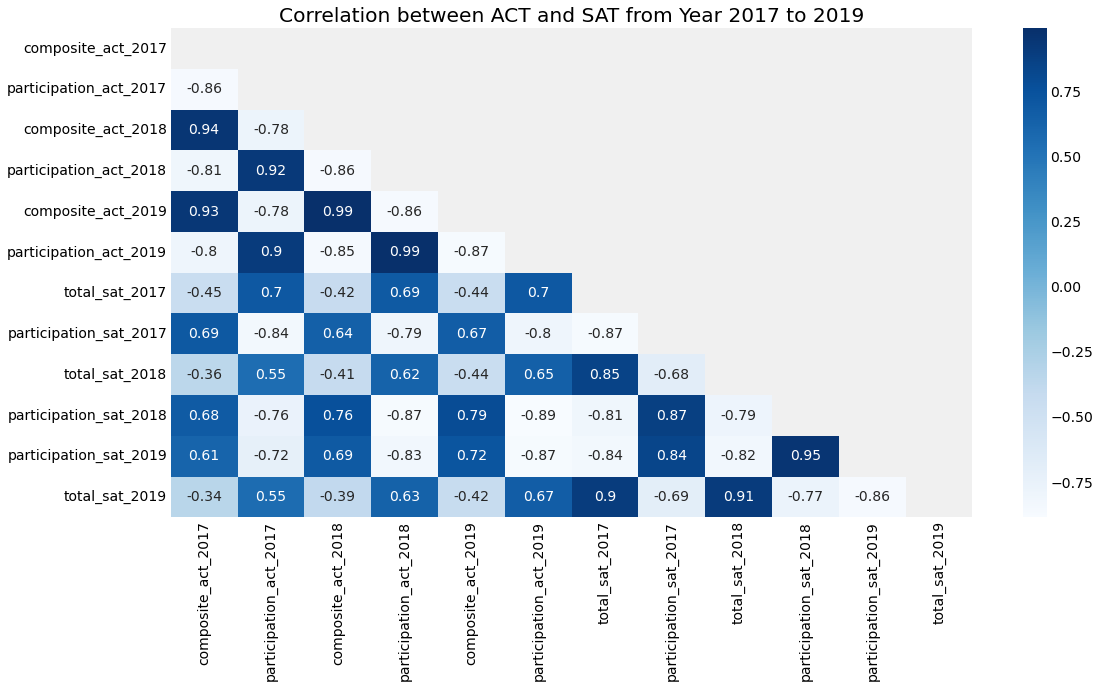

In [150]:
# Establish size of figure.
plt.figure(figsize=(16,9))
corr = combined_act_sat_2017_2018_2019.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Create correlation heatmap, and masking the upper triangle 
sns.heatmap(corr, mask = mask, annot=True, cmap='Blues')
plt.title('Correlation between ACT and SAT from Year 2017 to 2019');

**Observations**:

There is a negative correlation between 
- ACT composite and ACT participation; 
- SAT total and SAT participation;
- ACT participation and SAT participation; and
- ACT composite and SAT total scores (negative correlation is weak as it is less than -0.5).

We will further investigate and visualize the trend and correlation in scatter plots below. 

### Visualize distributions using histograms.

In [151]:
# Create function to use subplots histogram
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabels):
    sns.set_style('whitegrid') # Set seaborn style to increase contrast
    
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,16)) 
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].axvline(dataframe[column].mean(), c='red')
        
    # plot titles and xlabels    
    for i, ax in enumerate(ax):
        ax.set_title('{}'.format(list_of_titles[i]))
        ax.set_xlabel(xlabels)
        ax.set_ylabel('Frequency')

    # adjust spacings between axes
    plt.subplots_adjust(wspace=.25, hspace=.25)

In [152]:
# Create lists for plotting
totals = ['total_sat_2017', 'total_sat_2018', 'total_sat_2019','composite_act_2017','composite_act_2018', 'composite_act_2019']
participation = ['participation_act_2017', 'participation_act_2018', 'participation_act_2019', 'participation_sat_2017','participation_sat_2018','participation_sat_2019']

# create title lists
total_titles = ['ACT 2017 Composite','ACT 2018 Composite', 'ACT 2019 Composite', 'SAT 2017 Total', 'SAT 2018 Total', 'SAT 2019 Total']
participation_titles = ['ACT 2017 Participation Rate', 'ACT 2018 Participation Rate', 'ACT 2019 Participation Rate', 'SAT 2017 Participation Rate', 'SAT 2018 Participation Rate', 'SAT 2019 Participation Rate']

# create xlabels
total_xlabels = 'Total'
participation_xlabels = 'Participation'

**Histogram of ACT and SAT Participation Rate**

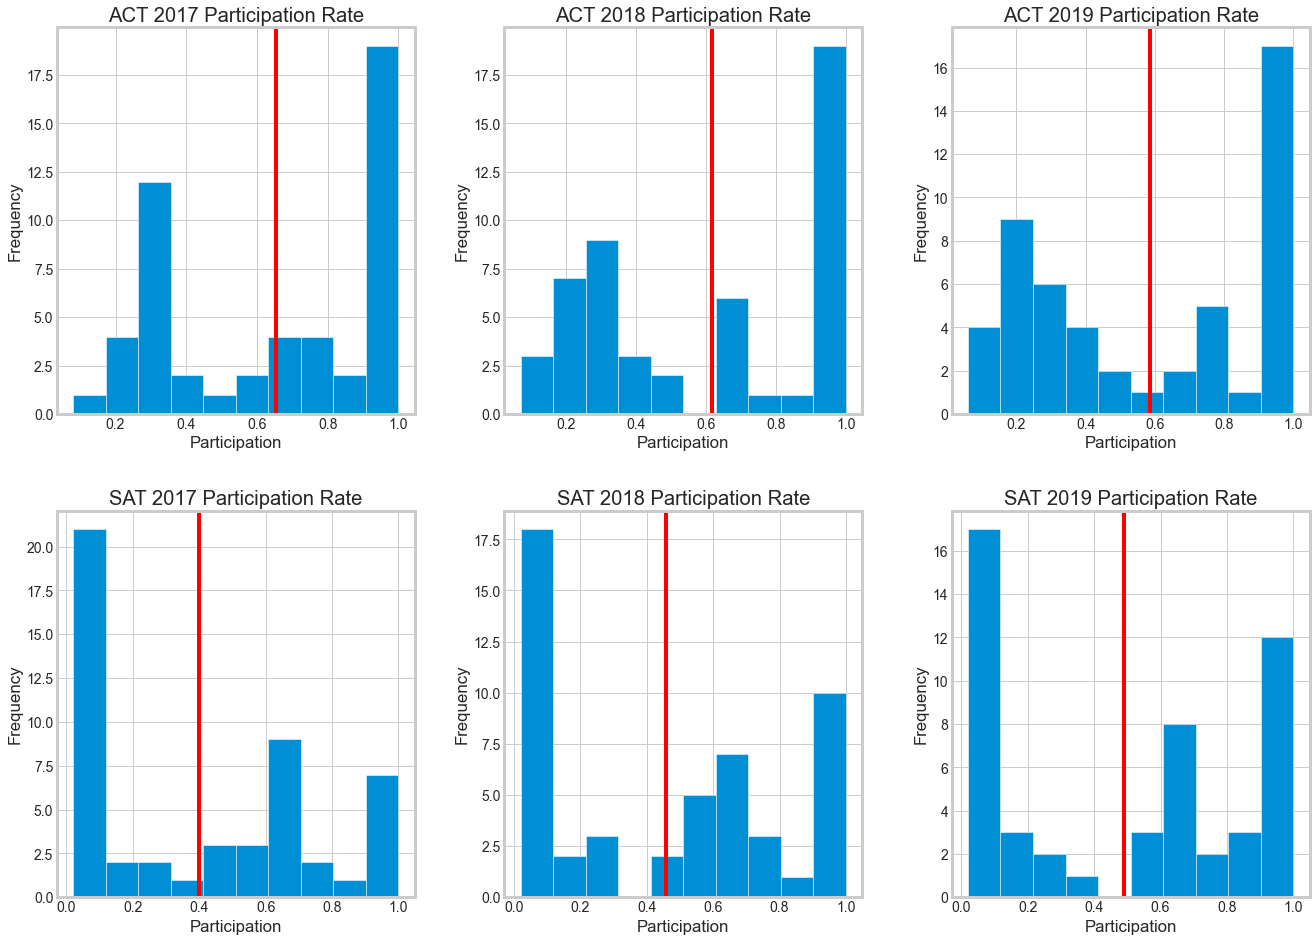

In [153]:
# Create histograms to show distribution of ACT and SAT participation rate.
subplot_histograms(dataframe = combined_act_sat_2017_2018_2019, list_of_columns = participation, list_of_titles = participation_titles, xlabels = participation_xlabels)

**Observations**:
- from year 2017 to 2019, mean of ACT participation was on downward trend.
- from year 2017 to 2019, mean of SAT participation have increased while its mean and median have decreased. 
- from year 2017 to 2019, there were more states with 0 to 20% participation in SAT compared to that of ACT.

**Histogram of ACT Composite and SAT Total Scores**

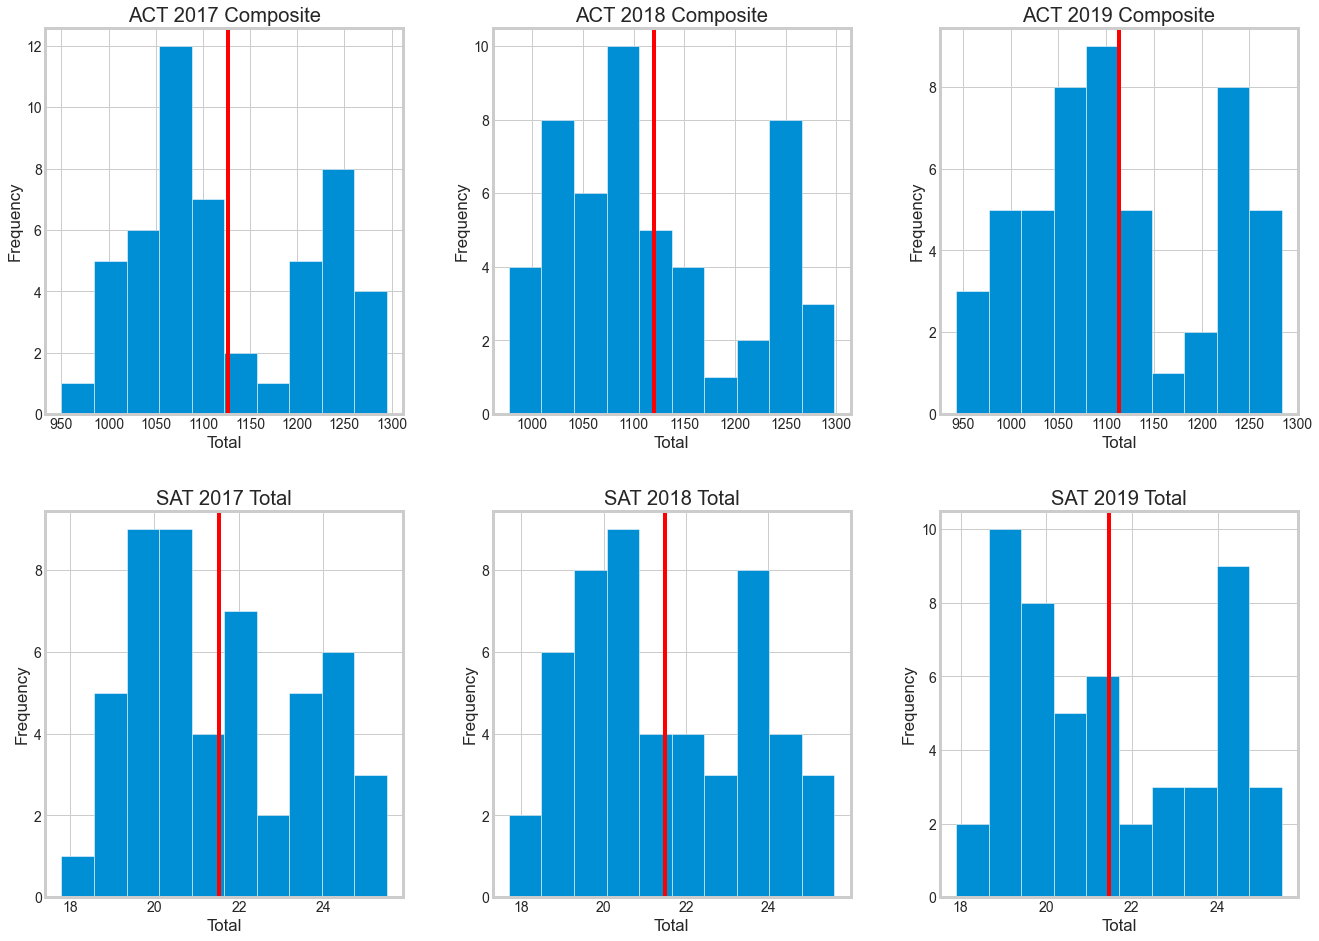

In [154]:
# Create histograms to show distribution of ACT Composite and SAT Total scores.
subplot_histograms(dataframe = combined_act_sat_2017_2018_2019, list_of_columns = totals, list_of_titles = total_titles, xlabels = total_xlabels)

**Observation**:
- from year 2017 to 2019, mean of ACT composite score was on downward trend while mean of SAT composite score was indifferent.

### Plot and interpret boxplots. 

#### ACT and SAT Participation from Year 2017 to 2019

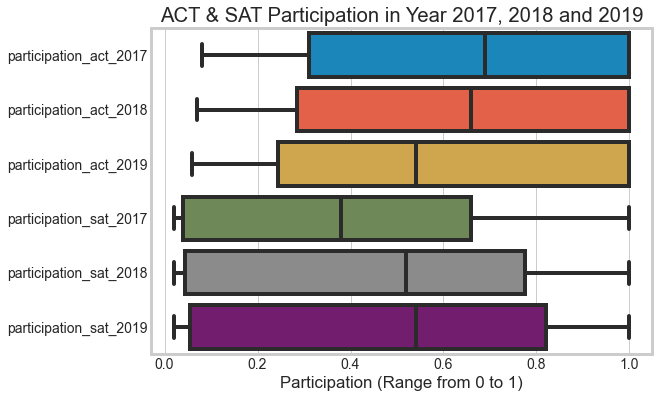

In [155]:
# Create boxplot to see if any relationship between participation and scores.
sns.boxplot(data=combined_act_sat_2017_2018_2019[['participation_act_2017', 'participation_act_2018', 'participation_act_2019','participation_sat_2017', 'participation_sat_2018', 'participation_sat_2019']], 
            orient = 'h').set(xlabel='Participation (Range from 0 to 1)', title = 'ACT & SAT Participation in Year 2017, 2018 and 2019');

**Observations**:

From boxplots above
- median for ACT was on downward trend and has dropped significantly in year 2019. 
- median for SAT was on upward trend and has increased significantly in year 2018.

Nonetheless, overall, ACT partication was higher than that of SAT in all three years.

#### ACT Composite scores from year 2017 to 2019.

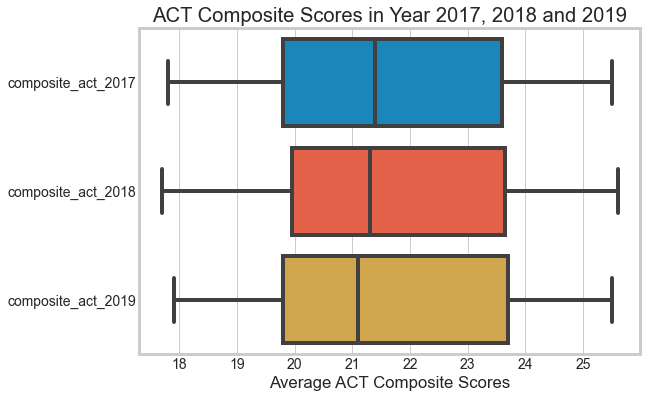

In [156]:
# Create boxplot to see if any clear outliers or differences in IQR for SAT Total Scores in Year 2017, 2018 and 2019.
sns.boxplot(data=combined_act_sat_2017_2018_2019[['composite_act_2017', 'composite_act_2018', 'composite_act_2019']], 
            orient = 'h').set(xlabel='Average ACT Composite Scores', title = 'ACT Composite Scores in Year 2017, 2018 and 2019');

**Observation**:
- inter-quartile range for average ACT composite scores were similar in all three years.

#### SAT Total Scores from Year 2017 to 2019

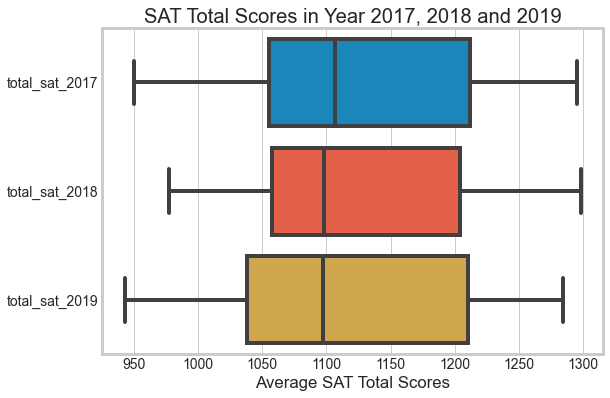

In [157]:
# Create boxplot to see if any clear outliers or differences in IQR for SAT Total Scores in Year 2017, 2018 and 2019.
sns.boxplot(data=combined_act_sat_2017_2018_2019[['total_sat_2017', 'total_sat_2018', 'total_sat_2019']], 
            orient = 'h').set(xlabel='Average SAT Total Scores', title = 'SAT Total Scores in Year 2017, 2018 and 2019');

From boxplots above, it is noted that inter-quartile range for average SAT scores were similar in all three years.

### Plot and Interpret Scatter Plots to View Relationships between Features

#### Plot Scatter Plots to Compare Participation against Scores for ACT and SAT from Year 2017 to 2019

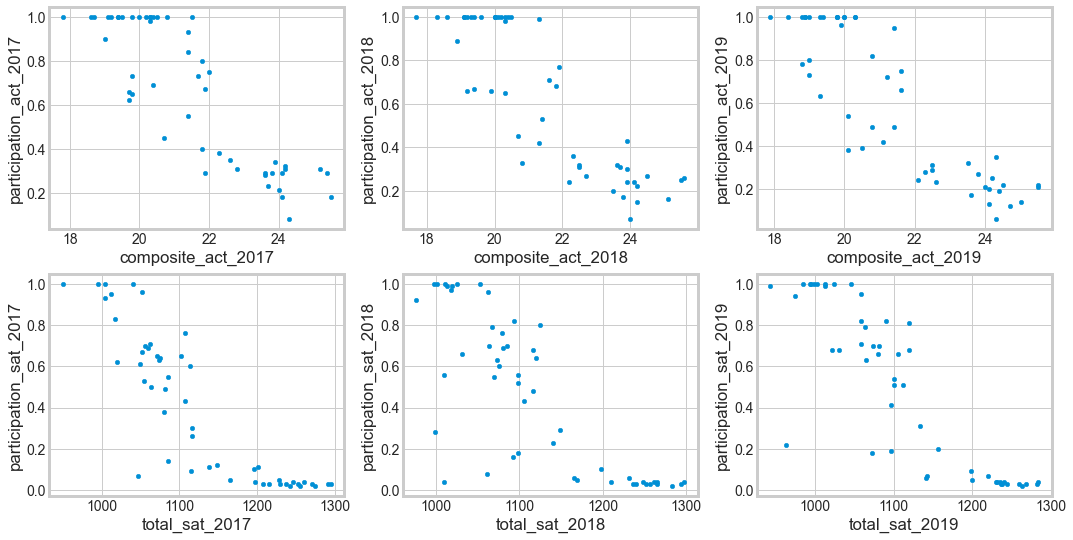

In [158]:
# Establish size of figure.
fig, axes = plt.subplots(2,3, figsize=(16,9));

# Create scatterplot to see if any relationship between participation and scores.
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='composite_act_2017', y='participation_act_2017', ax=axes[0][0]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='composite_act_2018', y='participation_act_2018', ax=axes[0][1]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='composite_act_2019', y='participation_act_2019', ax=axes[0][2]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2017', y='participation_sat_2017', ax=axes[1][0]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2018', y='participation_sat_2018', ax=axes[1][1]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2019', y='participation_sat_2019', ax=axes[1][2]);

**Observations**:

Scatter plots above show that there is negative correlation between participation and scores, for both ACT and SAT across all three year 2017, 2018 and 2019.
Negative correlation between participation and scores, for both ACT and SAT across all three year 2017, 2018 and 2019 are further shown below.

This pattern is consistent with external research ([*source*](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate)) on states' participation and scores whereby the scores are biased because a state’s with low participation in either ACT or SAT will only have the best students taking the exam. This makes the score artificially high. Likewise, if a state requires either ACT or SAT, it will have 100% participation but also include the worst exam takers who didn't study much and naturally not good at the exam, making the score artificially low.

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Composite Score in ACT 2017

In [159]:
# Function to plot scatter plot.
def plot_scatter_plot(dataframe, xlabel_name, ylabel_name, plt_xlabel_name, plt_ylabel_name, plt_titlelabel_name):
    
    # plot the Figure object
    fig = plt.figure(figsize=(6,6))

    # adding 2017 total and participation of ACT
    ax1 = fig.add_subplot()
    sns.regplot(data=dataframe, x=xlabel_name, y=ylabel_name)

    # adding title and labels
    plt.xlabel(plt_xlabel_name)
    plt.ylabel(plt_ylabel_name)
    plt.title(plt_titlelabel_name, fontsize=20);

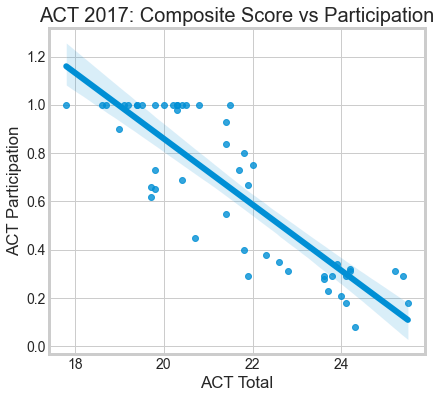

In [160]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'composite_act_2017', ylabel_name = 'participation_act_2017', plt_xlabel_name = 'ACT Total', plt_ylabel_name = 'ACT Participation', plt_titlelabel_name = "ACT 2017: Composite Score vs Participation")

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Composite Score in ACT 2018

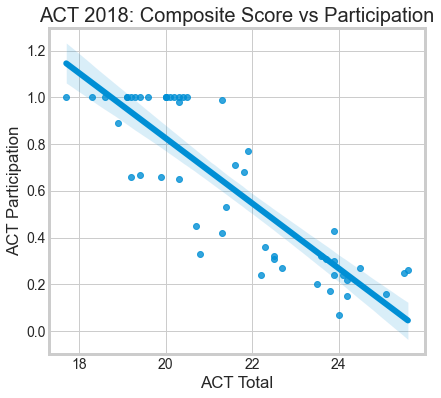

In [161]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'composite_act_2018', ylabel_name = 'participation_act_2018', plt_xlabel_name = 'ACT Total', plt_ylabel_name = 'ACT Participation', plt_titlelabel_name = "ACT 2018: Composite Score vs Participation")

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Composite Score in ACT 2019

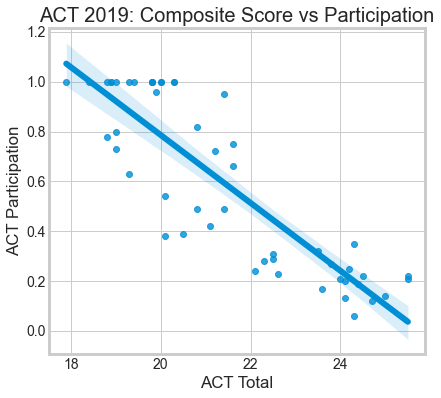

In [162]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'composite_act_2019', ylabel_name = 'participation_act_2019', plt_xlabel_name = 'ACT Total', plt_ylabel_name = 'ACT Participation', plt_titlelabel_name = "ACT 2019: Composite Score vs Participation")

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Total Score in SAT 2017

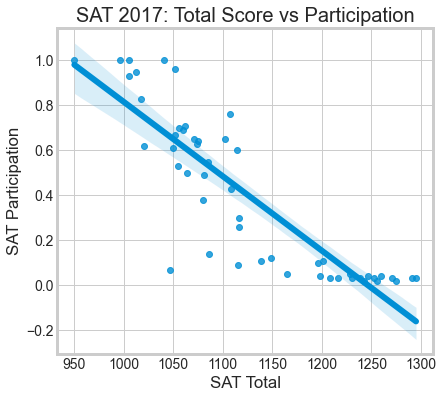

In [163]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2017', ylabel_name = 'participation_sat_2017', plt_xlabel_name = 'SAT Total', plt_ylabel_name = 'SAT Participation', plt_titlelabel_name = "SAT 2017: Total Score vs Participation")

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Total Score in SAT 2018

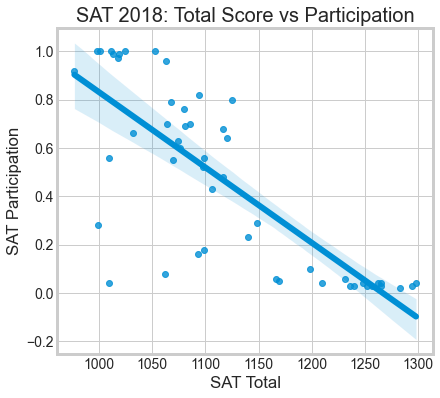

In [164]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2018', ylabel_name = 'participation_sat_2018', plt_xlabel_name = 'SAT Total', plt_ylabel_name = 'SAT Participation', plt_titlelabel_name = "SAT 2018: Total Score vs Participation")

#### Plot Scatter Plot with Trend Line to Show Correlation between Participation Rate and Total Score in SAT 2019

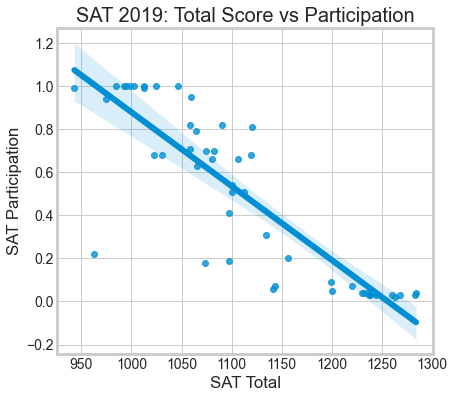

In [165]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2019', ylabel_name = 'participation_sat_2019', plt_xlabel_name = 'SAT Total', plt_ylabel_name = 'SAT Participation', plt_titlelabel_name = "SAT 2019: Total Score vs Participation")

**Observation**:
- Negative correlation between participation and scores is further confirmed in the trend line drawn in the scatter plots above.

#### Plot Scatter Plots to Compare ACT Participation against SAT Participation from Year 2017 to 2019

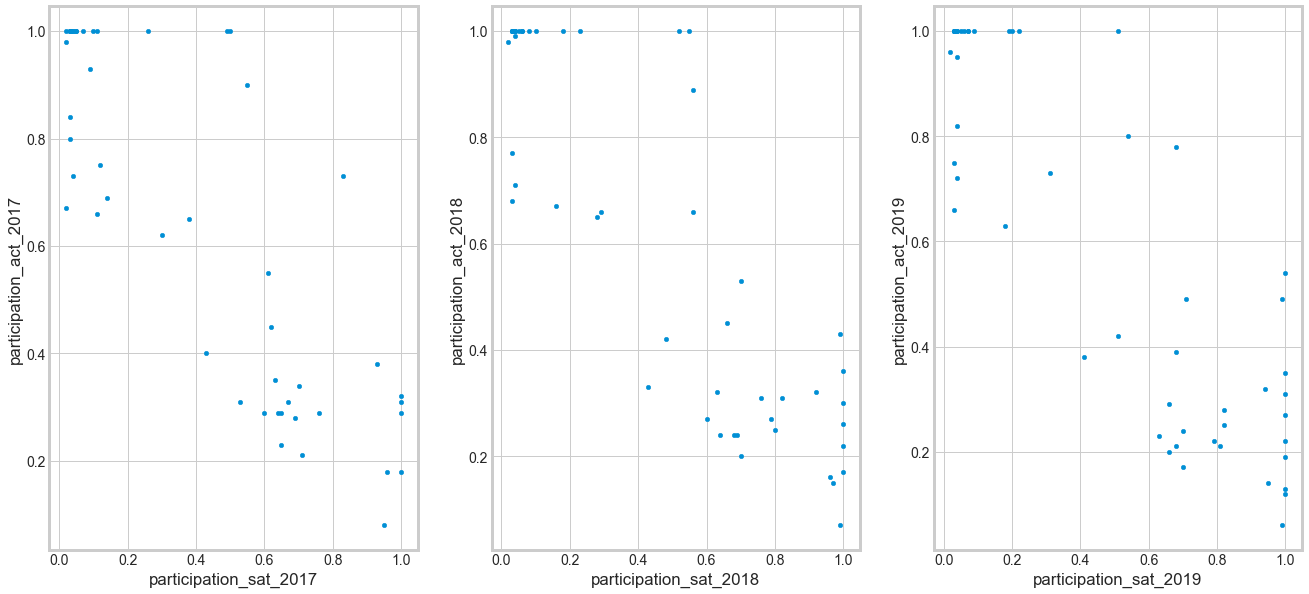

In [166]:
# Establish size of figure.
fig, axes = plt.subplots(1,3, figsize=(20,10));

# Create scatterplot to see if any relationship between participation and scores.
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='participation_sat_2017', y='participation_act_2017', ax=axes[0]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='participation_sat_2018', y='participation_act_2018', ax=axes[1]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='participation_sat_2019', y='participation_act_2019', ax=axes[2]);

**Observation**:

Scatter plots above show that there is negative correlation between both ACT and SAT participation across all three year 2017, 2018 and 2019.
Negative correlation between both ACT and SAT participation across all three year 2017, 2018 and 2019 are further shown in below.
This pattern is consistent with external research ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)) on states participation pattern in ACT or SAT whereby states that require all students to take only 1 exam, either ACT or SAT, as required by respective state, do not participate in another exam.

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Participation Rate and SAT Participation Rate in Year 2017

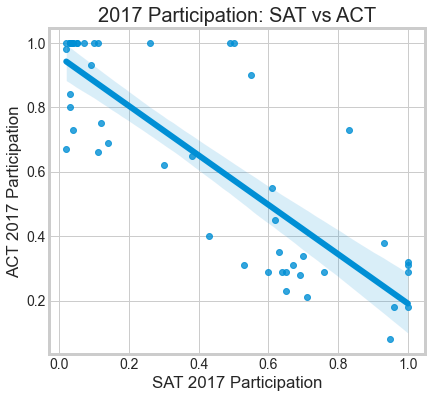

In [167]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'participation_sat_2017', ylabel_name = 'participation_act_2017', plt_xlabel_name = 'SAT 2017 Participation', plt_ylabel_name = 'ACT 2017 Participation', plt_titlelabel_name = '2017 Participation: SAT vs ACT')

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Participation Rate and SAT Participation Rate in year 2018

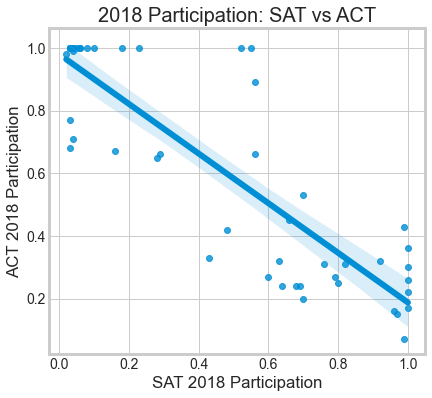

In [168]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'participation_sat_2018', ylabel_name = 'participation_act_2018', plt_xlabel_name = 'SAT 2018 Participation', plt_ylabel_name = 'ACT 2018 Participation', plt_titlelabel_name = '2018 Participation: SAT vs ACT')

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Participation Rate and SAT Participation Rate in year 2019

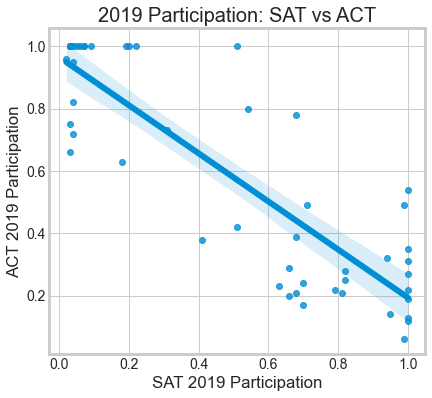

In [169]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'participation_sat_2019', ylabel_name = 'participation_act_2019', plt_xlabel_name = 'SAT 2019 Participation', plt_ylabel_name = 'ACT 2019 Participation', plt_titlelabel_name = '2019 Participation: SAT vs ACT')

**Observation**:
- Negative correlation between ACT and SAT participation across all three year 2017, 2018 and 2019 is further confirmed in the trend line drawn in the scatter plots above.

#### Plot Scatter Plots to Compare ACT Composite against SAT Total Scores from Year 2017 to 2019

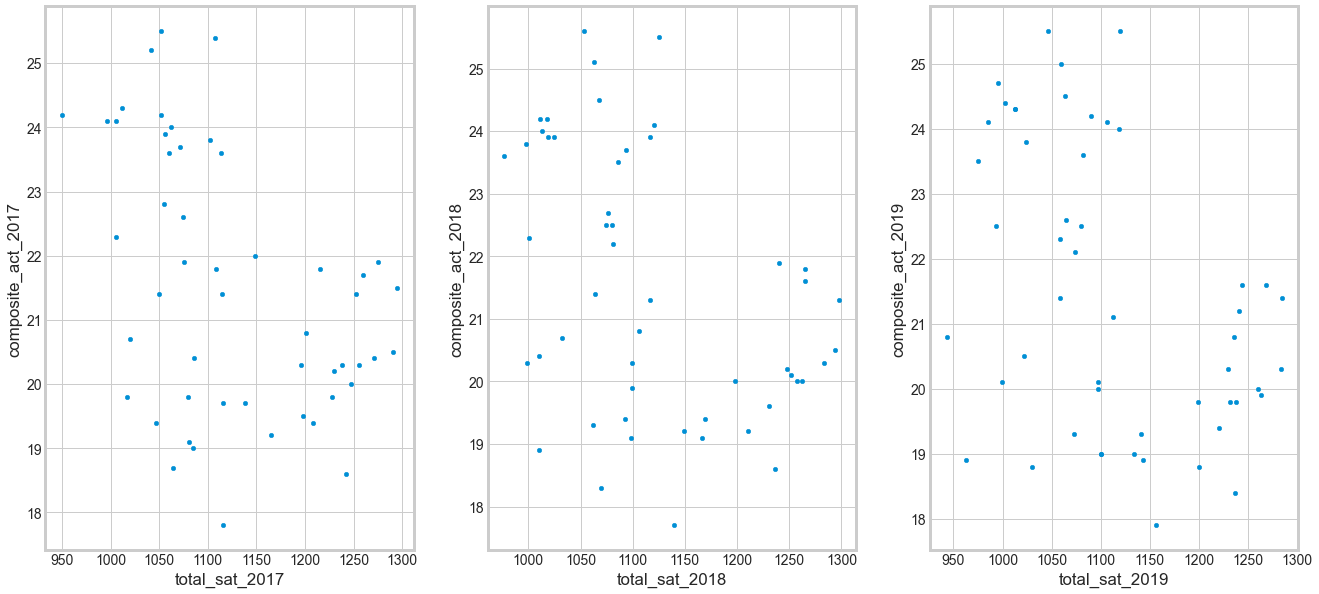

In [170]:
# Establish size of figure.
fig, axes = plt.subplots(1,3, figsize=(20,10));

# Create scatterplot to see if any relationship between participation and scores.
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2017', y='composite_act_2017', ax=axes[0]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2018', y='composite_act_2018', ax=axes[1]);
combined_act_sat_2017_2018_2019.plot(kind='scatter', x='total_sat_2019', y='composite_act_2019', ax=axes[2]);

**Observation**:

Scatter plots above show that there is negative correlation between both ACT Composite and SAT Total scores across all three year 2017, 2018 and 2019.
Negative correlation between both both ACT Composite and SAT Total scores across all three year 2017, 2018 and 2019 are further shown below.

This pattern exists because according to external research ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)), building on the negative correlation with participation rates, students taking the SAT and ACT exams differ systematically. Hence, average capability of a student taking one exam simply does not match the average student taking the other.

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Composite and SAT Total Score in Year 2017

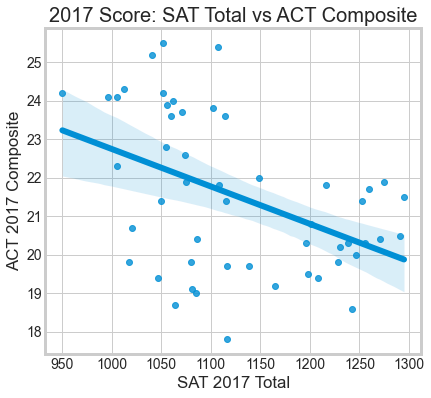

In [171]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2017', ylabel_name = 'composite_act_2017', plt_xlabel_name = 'SAT 2017 Total', plt_ylabel_name = 'ACT 2017 Composite', plt_titlelabel_name = '2017 Score: SAT Total vs ACT Composite')

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Composite and SAT Total Score in Year 2018

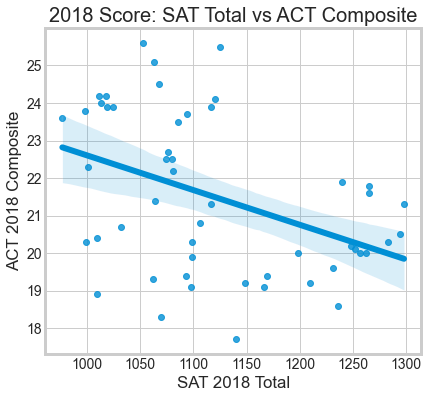

In [172]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2018', ylabel_name = 'composite_act_2018', plt_xlabel_name = 'SAT 2018 Total', plt_ylabel_name = 'ACT 2018 Composite', plt_titlelabel_name = '2018 Score: SAT Total vs ACT Composite')

#### Plot Scatter Plot with Trend Line to Show Correlation between ACT Composite and SAT Total Score in Year 2019

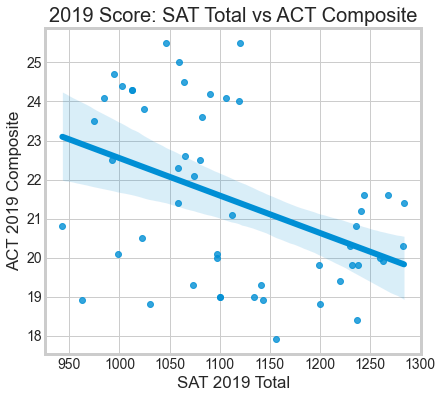

In [173]:
plot_scatter_plot(dataframe = combined_act_sat_2017_2018_2019, xlabel_name = 'total_sat_2019', ylabel_name = 'composite_act_2019', plt_xlabel_name = 'SAT 2019 Total', plt_ylabel_name = 'ACT 2019 Composite', plt_titlelabel_name = '2019 Score: SAT Total vs ACT Composite')

**Observation**:

The negative correlation between ACT Composite and SAT Total scores across all three year 2017, 2018 and 2019 is further confirmed in the trend line drawn in the scatter plots above.

## (Summary) Exploratory Data Analysis

**Key Observations**:
- from year 2017 to 2019, mean, median and minimum of ACT participation and composite were on downward trend.
- from year 2017 to 2019, both mean and median of SAT participation have increased while its mean and median of total SAT scores have decreased. 
- In year 2017, Colorado and Minnesota had 100% participation rate in ACT but their participation rates have dropped in year 2018 in which Colorado participation rate dropped to 30% in year 2018. Similarly, in year 2018, both Missouri and South Carolina had 100% participation rate but their participation rates have dropped in year 2019.
- from year 2017 to 2019, for both ACT and SAT college entrance exams, there is a negative correlation between 
  - ACT composite and ACT participation; 
  - SAT total and SAT participation;
  - ACT participation and SAT participation; and
  - ACT composite and SAT total scores (negative correlation is weak as it is less than -0.5).

# Conclusions

It is noted that, from year 2017 to 2019, for both ACT and SAT college entrance exams, there is a negative correlation between 
- ACT composite and ACT participation; 
- SAT total and SAT participation;
- ACT participation and SAT participation; and
- ACT composite and SAT total scores (negative correlation is weak as it is less than -0.5).

#### Negative Correlation between ACT composite and ACT participation; and SAT total and SAT participation

This pattern exists and is consistent with external research ([*source*](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate)) on states' participation and scores whereby the scores are biased because a state’s with low participation in either ACT or SAT will only have the best students taking the exam. This makes the score artificially high. Likewise, if a state requires either ACT or SAT, it will have 100% participation but also include the worst exam takers who didn't study much and naturally not good at the exam, making the score artificially low.

#### Negative Correlation between ACT Participation and SAT Participation

This pattern exists and is consistent with external research ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)) on states participation pattern in ACT or SAT whereby states that require all students to take only 1 exam, either ACT or SAT, as required by respective state, do not participate in another exam.

#### Negative Correlation between ACT Composite and SAT Total Scores

This pattern exists because according to external research ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)), building on the negative correlation with participation rates, students taking the SAT and ACT exams differ systematically. Hence, average capability of a student taking one exam simply does not match the average student taking the other.

Hence, increasing state's participation rate in either ACT or SAT college entrance exams will not to lead an improvement in respective exam score.

# Recommendations

As study is based on past years data (from year 2017 to 2019) and there is bias in respective exam score, to sharpen analysis, it is recommended to incorporate additional data from year 2020 to 2022 and to adjust states' ACT or SAT scores by comparing the scores against other states with similar participation rates.
([*source*](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate))